<a href="https://colab.research.google.com/github/ferrazzijk/Data-Industry-Salary-Prediction/blob/main/06_Data_Industry_Salary_Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The purpose of this project is to determine which data analysis skills are associated with higher salaries. We will use data scraped from [Glassdoor](https://www.glassdoor.com/member/home/index.htm). This file contains the model building and testing portions for the first 4 dataframes of the project. To view the scraping files of each role, please select the respective link in the Job Titles list. To view scraping exploration or the exploratory data analysis notebooks, please select the respective link from additional links.

**Job Titles:**
*   [Data Analyst](https://colab.research.google.com/drive/1AW0rNTs84Cq7GrJiDq86WWCisB4q6ZwO?usp=sharing)
*   [Business Analyst](https://colab.research.google.com/drive/1I1lolzuZgoUZGBwAEP9hZNf7my8XItbz?usp=sharing)
*   [Data Engineer](https://colab.research.google.com/drive/18HMhZXcv4xwxDUXGDauYEGdnDJLjNYxf?usp=sharing)
*   [Data Scientist](https://colab.research.google.com/drive/1i8UQMiObiOKAyzlrAsFCBPitqIh90Y5O?usp=sharing)

**Locations**
*   Austin, TX
*   Boston, MA
*   Chicago, IL
*   Colorado
*   Los Angeles, CA
*   New York City, NY
*   San Francisco, CA
*   Seattle, WA

**Additional Links**
*    [Scraping Exploration](https://colab.research.google.com/drive/1K1VMiRG_wzVm0wBSyBHoJJ77rSpZM-wf?usp=sharing)
*    [Exploratory Data Analysis](https://colab.research.google.com/drive/1lDlqmcv6xav48C5uj2YLJwK5UJ3BNYET?usp=sharing)
*    [Model Building & Testing Part 1](https://colab.research.google.com/drive/17wVHuX5pFcVi2V_r_11FdT1pVpzP8Dnw?usp=sharing)
*    [Model Building & Testing Part 2](https://colab.research.google.com/drive/1AyO8kZANyqWAacCn7Odrt5DhW9ZkAZEU?usp=sharing)

## **Set Environment**

In [ ]:
#set environment
import collections
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import scipy.stats as stats
import seaborn as sns
import spacy
import statsmodels.api as sm
import string
import textwrap

from bs4 import BeautifulSoup as soup
from collections import Counter
from IPython.core.display import clear_output
from nltk.corpus import stopwords
from random import randint
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import text
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import  classification_report, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost.sklearn import XGBRegressor
from statsmodels.tools.eval_measures import mse, rmse
from time import time, sleep
from wordcloud import WordCloud

nltk.download('stopwords')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Model Building & Testing**

We have 8 Dataframe's to test models on (developed in EDA notebook). The first four will be tested in this notebook and the second four in another notebook.
*   **all_jobs:** numeric data of extrapolated from the job descriptions. 5631 rows × 88 columns
*   **all_jobs_yrs_df**: all_jobs excluding jobs that did not have years of experience listed. 4696 rows × 88 columns
*   **all_jobs_no_outliers_df:** numeric data of extrapolated from the job descriptions, outliers removed. 5569 rows × 88 columns
*   **all_jobs_yrs_no_outliers_df**: ll_jobs excluding jobs that did not have years of experience listed, outliers removed. 4644 rows × 88 columns
*   **categories_df:** numeric data of combined sums of the categories we extrapolated from the job descriptions. 4696 rows × 16 columns
*   **yrs_exp_df**: categories excluding jobs that did not have years of experience listed. 1711 rows × 16 columns
*   **cat_no_outliers_df:** numeric data of combined sums of the categories we extrapolated from the job descriptions, outliers removed. 5569 rows × 16 columns
*   **yrs_exp_no_outliers_df**: categories excluding jobs that did not have years of experience listed, outliers removed. 4644 rows × 16 columns

For performance comparison, each will be tested with target variable as:
*    **Average Salary**
*    **Log of Average Salary**

### **Import Created Databases**

In [ ]:
all_jobs_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/all_jobs_df.csv?dl=0')
all_jobs_yrs_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/all_jobs_yrs_df.csv?dl=0')
all_jobs_no_outliers_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/all_jobs_no_outliers_df.csv?dl=0') 
all_jobs_yrs_no_outliers_df = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/Dataframes/all_jobs_yrs_no_outliers_df.csv?dl=0')

#create a list of above dataframes
dfs = [all_jobs_df, all_jobs_yrs_df, all_jobs_no_outliers_df, all_jobs_yrs_no_outliers_df]
#drop the unnamed column that transfers in & min & max salary
#add a log_sal column
for df in dfs:
  df.drop(columns=['Unnamed: 0', 'min_sal', 'max_sal'], inplace=True)
  df['log_avg_sal'] = np.log1p(df['avg_sal'])
  print(df.head())


   industry  rank  search_city  ...  spark  tensorflow  log_avg_sal
0         5   3.5            0  ...      1           0    11.177467
1        12   3.4            0  ...      0           0    10.809748
2         1   3.8            0  ...      0           0    11.042938
3         5   4.5            0  ...      0           0    10.768506
4         5   3.7            0  ...      0           0    11.034906

[5 rows x 87 columns]
   industry  rank  search_city  ...  spark  tensorflow  log_avg_sal
0         5   3.5            0  ...      1           0    11.177467
1        12   3.4            0  ...      0           0    10.809748
2         1   3.8            0  ...      0           0    11.042938
3         5   4.5            0  ...      0           0    10.768506
4         5   3.7            0  ...      0           0    11.034906

[5 rows x 87 columns]
   industry  rank  search_city  ...  spark  tensorflow  log_avg_sal
0         5   3.5            0  ...      1           0    11.177467
1 

### **Visualization of Target Variable**

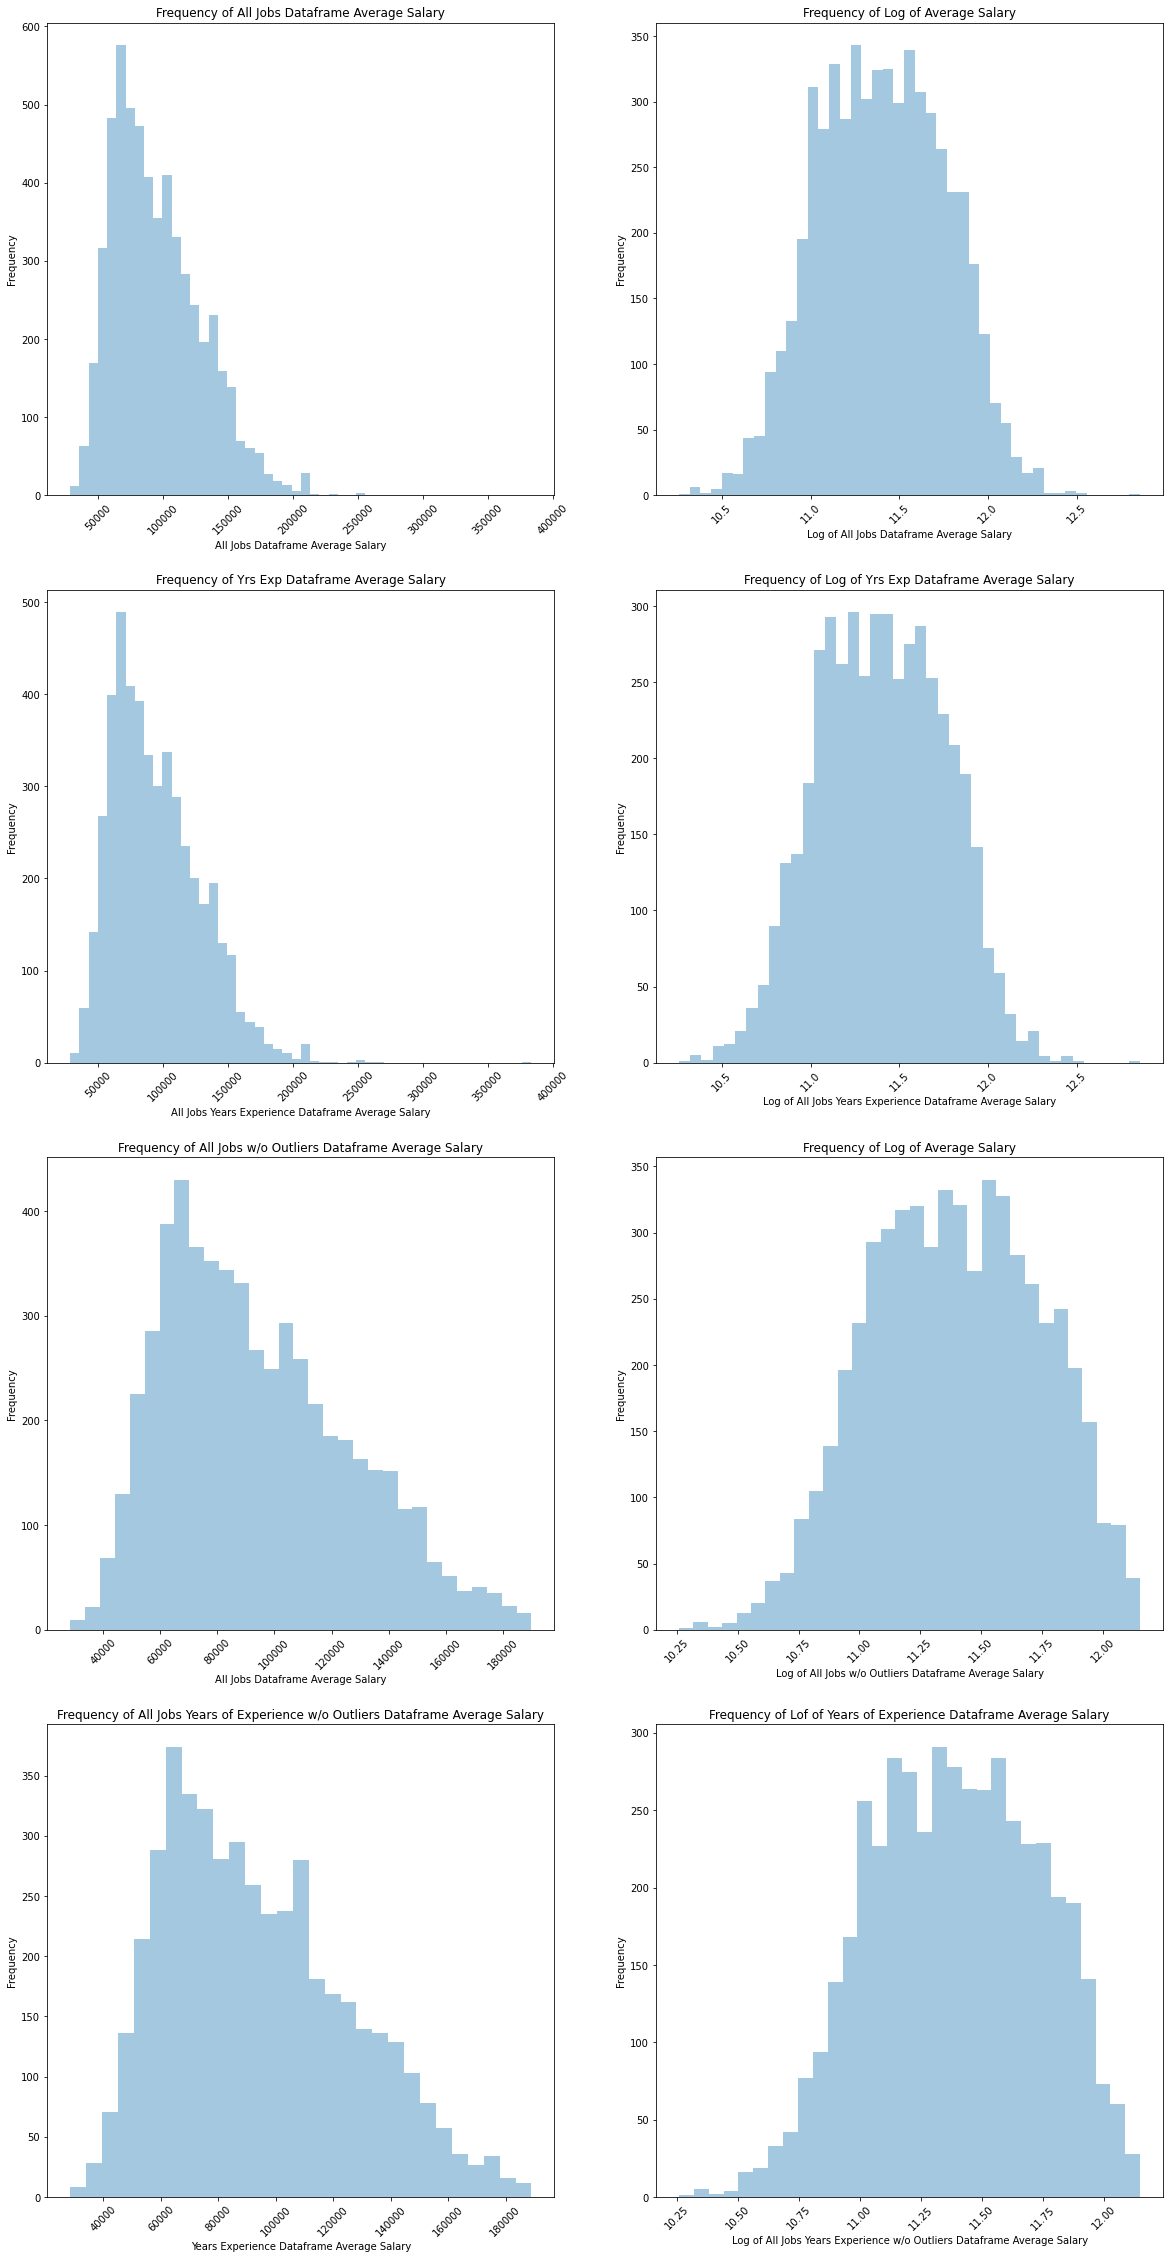

In [ ]:
#visualize all_jobs Dataframe Average Salary
plt.figure(figsize = (20,40))
plt.subplot(421)
sns.distplot(all_jobs_df['avg_sal'], kde = False)
plt.xlabel('All Jobs Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of All Jobs Dataframe Average Salary')
plt.xticks(rotation = 45)

plt.subplot(422)
#visualize Log of All Jobs Dataframe Average Salary
sns.distplot(all_jobs_df['log_avg_sal'], kde = False)
plt.xlabel('Log of All Jobs Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Average Salary')
plt.xticks(rotation = 45)

#visualize All Jobs Years Experience Dataframe Average Salary
plt.subplot(423)
sns.distplot(all_jobs_yrs_df['avg_sal'], kde = False)
plt.xlabel('All Jobs Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Yrs Exp Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of All Jobs Years Experience Dataframe Average Salary
plt.subplot(424)
sns.distplot(all_jobs_yrs_df['log_avg_sal'], kde = False)
plt.xlabel('Log of All Jobs Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Yrs Exp Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize All Jobs w/o Outliers Dataframe Average Salary
plt.subplot(425)
sns.distplot(all_jobs_no_outliers_df['avg_sal'], kde = False)
plt.xlabel('All Jobs Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of All Jobs w/o Outliers Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of All Jobs w/o Outliers Dataframe Average Salary
plt.subplot(426)
sns.distplot(all_jobs_no_outliers_df['log_avg_sal'], kde = False)
plt.xlabel('Log of All Jobs w/o Outliers Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Average Salary')
plt.xticks(rotation = 45)

#visualize All Jobs Years Experience w/o Outliers Dataframe Average Salary
plt.subplot(427)
sns.distplot(all_jobs_yrs_no_outliers_df['avg_sal'], kde = False)
plt.xlabel('Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of All Jobs Years of Experience w/o Outliers Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of All Jobs Years Experience w/o Outliers Dataframe Average Salary
plt.subplot(428)
sns.distplot(all_jobs_yrs_no_outliers_df['log_avg_sal'], kde = False)
plt.xlabel('Log of All Jobs Years Experience w/o Outliers Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Lof of Years of Experience Dataframe Average Salary')
plt.xticks(rotation = 45)
plt.show()

## **Linear Regression**

### **all_jobs_df**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
all_jobs_lr = LinearRegression()

#fit model
all_jobs_lr.fit(X_train, y_train)

#cross validate
all_jobs_lr_cv_scores = cross_val_score(all_jobs_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', all_jobs_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.50858666 0.51992523 0.4562611  0.45509321 0.45782479]
Mean Cross Validation Score: 0.479538198525829517659957446085173


In [ ]:
#generate predictions
all_jobs_lr_preds = all_jobs_lr.predict(X_test)

#get performance metrics
all_jobs_lr_rsquared_train = all_jobs_lr.score(X_train, y_train)
all_jobs_lr_rsquared_test = all_jobs_lr.score(X_test, y_test)
all_jobs_lr_mae = mean_absolute_error(y_test, all_jobs_lr_preds)
all_jobs_lr_mse = mse(y_test, all_jobs_lr_preds)
all_jobs_lr_rmse = rmse(y_test, all_jobs_lr_preds)
all_jobs_lr_mape = np.mean(np.abs((y_test - all_jobs_lr_preds)/y_test)*100)
all_jobs_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_lr_preds) / y_test)))) * 100
all_jobs_lr_model_name = 'All Jobs Linear Regression'

#create easily readable display of performance metrics
all_jobs_lr_dictionary = {'Model': all_jobs_lr_model_name,
  'Training Set R Squared': all_jobs_lr_rsquared_train, 
  'Test Set R Squared': all_jobs_lr_rsquared_test, 'Mean Absolute Error': all_jobs_lr_mae, 
  'Mean Sqaured Error': all_jobs_lr_mse, 'Root Mean Squared Error': all_jobs_lr_rmse,
  'Root Mean Squared Percentage Error': all_jobs_lr_rmspe,
  'Mean Absolute Percentage Error': all_jobs_lr_mape}

all_jobs_lr_df = pd.DataFrame(all_jobs_lr_dictionary, index=[0])

all_jobs_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Linear Regression,0.502239,0.515731,17951.945408,5.882632e+08,24254.137752,27.623236,20.039903


### **all_jobs_yrs_df**

In [ ]:
#set features & target
X= all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
all_jobs_yrs_lr = LinearRegression()

#fit model
all_jobs_yrs_lr.fit(X_train, y_train)

#cross validate
all_jobs_yrs_lr_cv_scores = cross_val_score(all_jobs_yrs_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.48056785 0.49958488 0.55402741 0.48278579 0.52050669]
Mean Cross Validation Score: 0.507494523233046779253641034301836


In [ ]:
#generate predictions
all_jobs_yrs_lr_preds = all_jobs_yrs_lr.predict(X_test)

#get performance metrics
all_jobs_yrs_lr_rsquared_train = all_jobs_yrs_lr.score(X_train, y_train)
all_jobs_yrs_lr_rsquared_test = all_jobs_yrs_lr.score(X_test, y_test)
all_jobs_yrs_lr_mae = mean_absolute_error(y_test, all_jobs_yrs_lr_preds)
all_jobs_yrs_lr_mse = mse(y_test, all_jobs_yrs_lr_preds)
all_jobs_yrs_lr_rmse = rmse(y_test, all_jobs_yrs_lr_preds)
all_jobs_yrs_lr_mape = np.mean(np.abs((y_test - all_jobs_yrs_lr_preds)/y_test)*100)
all_jobs_yrs_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_lr_preds) / y_test)))) * 100
all_jobs_yrs_model_name = 'All Jobs Years of Experience Linear Regression'

#create easily readable display of performance metrics
all_jobs_yrs_lr_dictionary = {'Model': all_jobs_yrs_model_name,
  'Training Set R Squared': all_jobs_yrs_lr_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_lr_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_lr_mae, 
  'Mean Sqaured Error': all_jobs_yrs_lr_mse, 'Root Mean Squared Error': all_jobs_yrs_lr_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_lr_rmspe,  
  'Mean Absolute Percentage Error': all_jobs_yrs_lr_mape}

all_jobs_yrs_lr_df = pd.DataFrame(all_jobs_yrs_lr_dictionary, index=[0])

all_jobs_yrs_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Linear Regression,0.532484,0.514905,17924.403684,5.806518e+08,24096.718223,29.026559,20.791367


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_all_jobs_lr = LinearRegression()

#fit model
log_all_jobs_lr.fit(X_train, y_train)

#cross validate
log_all_jobs_lr_cv_scores = cross_val_score(log_all_jobs_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_all_jobs_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.51477481 0.53187937 0.4631143  0.5017575  0.47841639]
Mean Cross Validation Score: 0.497988473443452595024183437999454


In [ ]:
#generate predictions
log_all_jobs_lr_preds = log_all_jobs_lr.predict(X_test)

#get performance metrics
log_all_jobs_lr_rsquared_train = log_all_jobs_lr.score(X_train, y_train)
log_all_jobs_lr_rsquared_test = log_all_jobs_lr.score(X_test, y_test)
log_all_jobs_lr_mae = mean_absolute_error(y_test, log_all_jobs_lr_preds)
log_all_jobs_lr_mse = mse(y_test, log_all_jobs_lr_preds)
log_all_jobs_lr_rmse = rmse(y_test, log_all_jobs_lr_preds)
log_all_jobs_lr_mape = np.mean(np.abs((y_test - log_all_jobs_lr_preds)/y_test)*100)
log_all_jobs_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_lr_preds) / y_test)))) * 100
log_all_jobs_lr_model_name = 'All Jobs Linear Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_lr_dictionary = {'Model': log_all_jobs_lr_model_name,
  'Training Set R Squared': log_all_jobs_lr_rsquared_train, 
  'Test Set R Squared': log_all_jobs_lr_rsquared_test, 'Mean Absolute Error': log_all_jobs_lr_mae, 
  'Mean Sqaured Error': log_all_jobs_lr_mse, 'Root Mean Squared Error': log_all_jobs_lr_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_lr_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_lr_mape}

log_all_jobs_lr_df = pd.DataFrame(log_all_jobs_lr_dictionary, index=[0])

log_all_jobs_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Linear Regression Log(y),0.517595,0.526732,0.189131,0.060926,0.246831,2.168248,1.659797


### **all_jobs_yrs_df log(y)**

In [ ]:
#set features & target
X= all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_all_jobs_yrs_lr = LinearRegression()

#fit model
log_all_jobs_yrs_lr.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_lr_cv_scores = cross_val_score(log_all_jobs_yrs_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.50213683 0.50696984 0.54694365 0.51545166 0.53069484]
Mean Cross Validation Score: 0.520439364544587723671043022477534


In [ ]:
#generate predictions
log_all_jobs_yrs_lr_preds = log_all_jobs_yrs_lr.predict(X_test)

#get performance metrics
log_all_jobs_yrs_lr_rsquared_train = log_all_jobs_yrs_lr.score(X_train, y_train)
log_all_jobs_yrs_lr_rsquared_test = log_all_jobs_yrs_lr.score(X_test, y_test)
log_all_jobs_yrs_lr_mae = mean_absolute_error(y_test, log_all_jobs_yrs_lr_preds)
log_all_jobs_yrs_lr_mse = mse(y_test, log_all_jobs_yrs_lr_preds)
log_all_jobs_yrs_lr_rmse = rmse(y_test, log_all_jobs_yrs_lr_preds)
log_all_jobs_yrs_lr_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_lr_preds)/y_test)*100)
log_all_jobs_yrs_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_lr_preds) / y_test)))) * 100
all_jobs_yrs_model_name = 'All Jobs Years of Experience Linear Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_lr_dictionary = {'Model': all_jobs_yrs_model_name,
  'Training Set R Squared': log_all_jobs_yrs_lr_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_lr_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_lr_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_lr_mse, 'Root Mean Squared Error': log_all_jobs_yrs_lr_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_lr_rmspe,  
  'Mean Absolute Percentage Error': log_all_jobs_yrs_lr_mape}

log_all_jobs_yrs_lr_df = pd.DataFrame(log_all_jobs_yrs_lr_dictionary, index=[0])

log_all_jobs_yrs_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Linear Regression...,0.543033,0.540142,0.189097,0.060058,0.245068,2.168241,1.666271


### **all_jobs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
all_jobs_no_outliers_lr = LinearRegression()

#fit model
all_jobs_no_outliers_lr.fit(X_train, y_train)

#cross validate
all_jobs_no_outliers_lr_cv_scores = cross_val_score(all_jobs_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', all_jobs_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.53103779 0.50283448 0.52454855 0.46802873 0.50765144]
Mean Cross Validation Score: 0.506820197412478412601899435685482


In [ ]:
#generate predictions
all_jobs_no_outliers_lr_preds = all_jobs_no_outliers_lr.predict(X_test)

#get performance metrics
all_jobs_no_outliers_lr_rsquared_train = all_jobs_no_outliers_lr.score(X_train, y_train)
all_jobs_no_outliers_lr_rsquared_test = all_jobs_no_outliers_lr.score(X_test, y_test)
all_jobs_no_outliers_lr_mae = mean_absolute_error(y_test, all_jobs_no_outliers_lr_preds)
all_jobs_no_outliers_lr_mse = mse(y_test, all_jobs_no_outliers_lr_preds)
all_jobs_no_outliers_lr_rmse = rmse(y_test, all_jobs_no_outliers_lr_preds)
all_jobs_no_outliers_lr_mape = np.mean(np.abs((y_test - all_jobs_no_outliers_lr_preds)/y_test)*100)
all_jobs_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_no_outliers_lr_preds) / y_test)))) * 100
all_jobs_no_outliers_lr_model_name = 'All Jobs w/o Outliers Linear Regression'

#create easily readable display of performance metrics
all_jobs_no_outliers_lr_dictionary = {'Model': all_jobs_no_outliers_lr_model_name,
  'Training Set R Squared': all_jobs_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': all_jobs_no_outliers_lr_rsquared_test, 'Mean Absolute Error': all_jobs_no_outliers_lr_mae, 
  'Mean Sqaured Error': all_jobs_no_outliers_lr_mse, 'Root Mean Squared Error': all_jobs_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': all_jobs_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': all_jobs_no_outliers_lr_mape}

all_jobs_no_outliers_lr_df = pd.DataFrame(all_jobs_no_outliers_lr_dictionary, index=[0])

all_jobs_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Linear Regression,0.527201,0.497683,17476.182556,5.178905e+08,22757.208557,27.51392,20.160372


### **all_jobs_yrs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
all_jobs_yrs_no_outliers_lr = LinearRegression()

#fit model
all_jobs_yrs_no_outliers_lr.fit(X_train, y_train)

#cross validate
all_jobs_yrs_no_outliers_lr_cv_scores = cross_val_score(all_jobs_yrs_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.53501174 0.55487478 0.52125918 0.45106274 0.54461337]
Mean Cross Validation Score: 0.521364361149269095463409939839039


In [ ]:
#generate predictions
all_jobs_yrs_no_outliers_lr_preds = all_jobs_yrs_no_outliers_lr.predict(X_test)

#get performance metrics
all_jobs_yrs_no_outliers_lr_rsquared_train = all_jobs_yrs_no_outliers_lr.score(X_train, y_train)
all_jobs_yrs_no_outliers_lr_rsquared_test = all_jobs_yrs_no_outliers_lr.score(X_test, y_test)
all_jobs_yrs_no_outliers_lr_mae = mean_absolute_error(y_test, all_jobs_yrs_no_outliers_lr_preds)
all_jobs_yrs_no_outliers_lr_mse = mse(y_test, all_jobs_yrs_no_outliers_lr_preds)
all_jobs_yrs_no_outliers_lr_rmse = rmse(y_test, all_jobs_yrs_no_outliers_lr_preds)
all_jobs_yrs_no_outliers_lr_mape = np.mean(np.abs((y_test - all_jobs_yrs_no_outliers_lr_preds)/y_test)*100)
all_jobs_yrs_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_no_outliers_lr_preds) / y_test)))) * 100
all_jobs_yrs_no_outliers_lr_model_name = 'All Jobs Years of Experience w/o Outliers Linear Regression'

#create easily readable display of performance metrics
all_jobs_yrs_no_outliers_lr_dictionary = {'Model': all_jobs_yrs_no_outliers_lr_model_name,
  'Training Set R Squared': all_jobs_yrs_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_no_outliers_lr_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_no_outliers_lr_mae, 
  'Mean Sqaured Error': all_jobs_yrs_no_outliers_lr_mse, 'Root Mean Squared Error': all_jobs_yrs_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_no_outliers_lr_mape}

all_jobs_yrs_no_outliers_lr_df = pd.DataFrame(all_jobs_yrs_no_outliers_lr_dictionary, index=[0])

all_jobs_yrs_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Line...,0.54981,0.506605,16730.401047,4.701160e+08,21682.158711,27.432156,19.317534


### **all_jobs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_all_jobs_no_outliers_lr = LinearRegression()

#fit model
log_all_jobs_no_outliers_lr.fit(X_train, y_train)

#cross validate
log_all_jobs_no_outliers_lr_cv_scores = cross_val_score(log_all_jobs_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_all_jobs_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.52185014 0.49030444 0.52510087 0.47664702 0.50209155]
Mean Cross Validation Score: 0.503198802787354848575773758057039


In [ ]:
#generate predictions
log_all_jobs_no_outliers_lr_preds = log_all_jobs_no_outliers_lr.predict(X_test)

#get performance metrics
log_all_jobs_no_outliers_lr_rsquared_train = log_all_jobs_no_outliers_lr.score(X_train, y_train)
log_all_jobs_no_outliers_lr_rsquared_test = log_all_jobs_no_outliers_lr.score(X_test, y_test)
log_all_jobs_no_outliers_lr_mae = mean_absolute_error(y_test, log_all_jobs_no_outliers_lr_preds)
log_all_jobs_no_outliers_lr_mse = mse(y_test, log_all_jobs_no_outliers_lr_preds)
log_all_jobs_no_outliers_lr_rmse = rmse(y_test, log_all_jobs_no_outliers_lr_preds)
log_all_jobs_no_outliers_lr_mape = np.mean(np.abs((y_test - log_all_jobs_no_outliers_lr_preds)/y_test)*100)
log_all_jobs_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_no_outliers_lr_preds) / y_test)))) * 100
log_all_jobs_no_outliers_lr_model_name = 'All Jobs w/o Outliers Linear Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_no_outliers_lr_dictionary = {'Model': log_all_jobs_no_outliers_lr_model_name,
  'Training Set R Squared': log_all_jobs_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': log_all_jobs_no_outliers_lr_rsquared_test, 'Mean Absolute Error': log_all_jobs_no_outliers_lr_mae, 
  'Mean Sqaured Error': log_all_jobs_no_outliers_lr_mse, 'Root Mean Squared Error': log_all_jobs_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_no_outliers_lr_mape}

log_all_jobs_no_outliers_lr_df = pd.DataFrame(log_all_jobs_no_outliers_lr_dictionary, index=[0])

log_all_jobs_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Linear Regression Log(y),0.522391,0.500464,0.188945,0.059148,0.243204,2.144348,1.661739


### **all_jobs_yrs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_all_jobs_yrs_no_outliers_lr = LinearRegression()

#fit model
log_all_jobs_yrs_no_outliers_lr.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_no_outliers_lr_cv_scores = cross_val_score(log_all_jobs_yrs_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.5416914  0.56000852 0.51363691 0.44718453 0.52981011]
Mean Cross Validation Score: 0.518466294294426033317790825094562


In [ ]:
#generate predictions
log_all_jobs_yrs_no_outliers_lr_preds = log_all_jobs_yrs_no_outliers_lr.predict(X_test)

#get performance metrics
log_all_jobs_yrs_no_outliers_lr_rsquared_train = log_all_jobs_yrs_no_outliers_lr.score(X_train, y_train)
log_all_jobs_yrs_no_outliers_lr_rsquared_test = log_all_jobs_yrs_no_outliers_lr.score(X_test, y_test)
log_all_jobs_yrs_no_outliers_lr_mae = mean_absolute_error(y_test, log_all_jobs_yrs_no_outliers_lr_preds)
log_all_jobs_yrs_no_outliers_lr_mse = mse(y_test, log_all_jobs_yrs_no_outliers_lr_preds)
log_all_jobs_yrs_no_outliers_lr_rmse = rmse(y_test, log_all_jobs_yrs_no_outliers_lr_preds)
log_all_jobs_yrs_no_outliers_lr_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_no_outliers_lr_preds)/y_test)*100)
log_all_jobs_yrs_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_no_outliers_lr_preds) / y_test)))) * 100
log_all_jobs_yrs_no_outliers_lr_model_name = 'All Jobs Years of Experience w/o Outliers Linear Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_no_outliers_lr_dictionary = {'Model': log_all_jobs_yrs_no_outliers_lr_model_name,
  'Training Set R Squared': log_all_jobs_yrs_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_no_outliers_lr_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_no_outliers_lr_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_no_outliers_lr_mse, 'Root Mean Squared Error': log_all_jobs_yrs_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_no_outliers_lr_mape}

log_all_jobs_yrs_no_outliers_lr_df = pd.DataFrame(log_all_jobs_yrs_no_outliers_lr_dictionary, index=[0])

log_all_jobs_yrs_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Line...,0.544983,0.50464,0.181751,0.054524,0.233505,2.063824,1.598385


## **Ridge Regression**

### **all_jobs_df**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

all_jobs_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
all_jobs_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_ridge = all_jobs_ridge_grid.best_estimator_

all_jobs_ridge.fit(X_train, y_train)

#cross validate
all_jobs_ridge_scores = cross_val_score(all_jobs_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.50857838 0.52196343 0.45761889 0.45476986 0.46412615]
Mean Cross Validation Score: 0.481411340028360723586331459955545


In [ ]:
#generate predictions
all_jobs_ridge_preds = all_jobs_ridge.predict(X_test)

#more performance metrics
all_jobs_ridge_rsquared_train = all_jobs_ridge.score(X_train, y_train)
all_jobs_ridge_rsquared_test = all_jobs_ridge.score(X_test, y_test)
all_jobs_ridge_mae = mean_absolute_error(y_test, all_jobs_ridge_preds)
all_jobs_ridge_mse = mse(y_test, all_jobs_ridge_preds)
all_jobs_ridge_rmse = rmse(y_test, all_jobs_ridge_preds)
all_jobs_ridge_mape = np.mean(np.abs((y_test - all_jobs_ridge_preds)/y_test)*100)
all_jobs_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_ridge_preds) / y_test)))) * 100
all_jobs_ridge_model_name = 'All Jobs Ridge Regression'

#create easily readable display of performance metrics
all_jobs_ridge_dictionary = {'Model': all_jobs_ridge_model_name,
  'Training Set R Squared': all_jobs_ridge_rsquared_train, 
  'Test Set R Squared': all_jobs_ridge_rsquared_test, 'Mean Absolute Error': all_jobs_ridge_mae, 
  'Mean Sqaured Error': all_jobs_ridge_mse, 'Root Mean Squared Error': all_jobs_ridge_rmse,
  'Root Mean Squared Percentage Error': all_jobs_ridge_rmspe,
  'Mean Absolute Percentage Error': all_jobs_ridge_mape}

all_jobs_ridge_df = pd.DataFrame(all_jobs_ridge_dictionary, index=[0])

all_jobs_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Ridge Regression,0.501529,0.516924,17950.280953,5.868147e+08,24224.257817,27.614161,20.045775


### **all_jobs_yrs_df**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

all_jobs_yrs_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
all_jobs_yrs_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_ridge = all_jobs_yrs_ridge_grid.best_estimator_

all_jobs_yrs_ridge.fit(X_train, y_train)

#cross validate
all_jobs_yrs_ridge_scores = cross_val_score(all_jobs_yrs_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.48131815 0.49994643 0.55850643 0.48638524 0.5228916 ]
Mean Cross Validation Score: 0.509809567990207046506156984833069


In [ ]:
#generate predictions
all_jobs_yrs_ridge_preds = all_jobs_yrs_ridge.predict(X_test)

#more performance metrics
all_jobs_yrs_ridge_rsquared_train = all_jobs_yrs_ridge.score(X_train, y_train)
all_jobs_yrs_ridge_rsquared_test = all_jobs_yrs_ridge.score(X_test, y_test)
all_jobs_yrs_ridge_mae = mean_absolute_error(y_test, all_jobs_yrs_ridge_preds)
all_jobs_yrs_ridge_mse = mse(y_test, all_jobs_yrs_ridge_preds)
all_jobs_yrs_ridge_rmse = rmse(y_test, all_jobs_yrs_ridge_preds)
all_jobs_yrs_ridge_mape = np.mean(np.abs((y_test - all_jobs_yrs_ridge_preds)/y_test)*100)
all_jobs_yrs_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_ridge_preds) / y_test)))) * 100
all_jobs_yrs_model_name = 'All Jobs Years of Experience Ridge Regression'

#create easily readable display of performance metrics
all_jobs_yrs_ridge_dictionary = {'Model': all_jobs_yrs_model_name, 
  'Training Set R Squared': all_jobs_yrs_ridge_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_ridge_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_ridge_mae, 
  'Mean Sqaured Error': all_jobs_yrs_ridge_mse, 'Root Mean Squared Error': all_jobs_yrs_ridge_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_ridge_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_ridge_mape}

all_jobs_yrs_ridge_df = pd.DataFrame(all_jobs_yrs_ridge_dictionary, index=[0])

all_jobs_yrs_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Ridge Regression,0.531356,0.518365,17878.89799,5.765101e+08,24010.623875,28.978791,20.759618


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_all_jobs_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_all_jobs_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_ridge = log_all_jobs_ridge_grid.best_estimator_

log_all_jobs_ridge.fit(X_train, y_train)

#cross validate
log_all_jobs_ridge_scores = cross_val_score(log_all_jobs_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.51488863 0.53223854 0.46498018 0.50152387 0.48436839]
Mean Cross Validation Score: 0.499599921343014785612979267170886


In [ ]:
#generate predictions
log_all_jobs_ridge_preds = log_all_jobs_ridge.predict(X_test)

#more performance metrics
log_all_jobs_ridge_rsquared_train = log_all_jobs_ridge.score(X_train, y_train)
log_all_jobs_ridge_rsquared_test = log_all_jobs_ridge.score(X_test, y_test)
log_all_jobs_ridge_mae = mean_absolute_error(y_test, log_all_jobs_ridge_preds)
log_all_jobs_ridge_mse = mse(y_test, log_all_jobs_ridge_preds)
log_all_jobs_ridge_rmse = rmse(y_test, log_all_jobs_ridge_preds)
log_all_jobs_ridge_mape = np.mean(np.abs((y_test - log_all_jobs_ridge_preds)/y_test)*100)
log_all_jobs_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_ridge_preds) / y_test)))) * 100
log_all_jobs_ridge_model_name = 'All Jobs Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_ridge_dictionary = {'Model': log_all_jobs_ridge_model_name,
  'Training Set R Squared': log_all_jobs_ridge_rsquared_train, 
  'Test Set R Squared': log_all_jobs_ridge_rsquared_test, 'Mean Absolute Error': log_all_jobs_ridge_mae, 
  'Mean Sqaured Error': log_all_jobs_ridge_mse, 'Root Mean Squared Error': log_all_jobs_ridge_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_ridge_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_ridge_mape}

log_all_jobs_ridge_df = pd.DataFrame(log_all_jobs_ridge_dictionary, index=[0])

log_all_jobs_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Ridge Regression Log(y),0.516991,0.527871,0.189037,0.060779,0.246534,2.165821,1.65897


### **all_jobs_yrs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_all_jobs_yrs_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_all_jobs_yrs_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_ridge = log_all_jobs_yrs_ridge_grid.best_estimator_

log_all_jobs_yrs_ridge.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_ridge_scores = cross_val_score(log_all_jobs_yrs_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.5037119  0.50778786 0.55049443 0.51755391 0.53282981]
Mean Cross Validation Score: 0.522475581263781685414926414523507


In [ ]:
#generate predictions
log_all_jobs_yrs_ridge_preds = log_all_jobs_yrs_ridge.predict(X_test)

#more performance metrics
log_all_jobs_yrs_ridge_rsquared_train = log_all_jobs_yrs_ridge.score(X_train, y_train)
log_all_jobs_yrs_ridge_rsquared_test = log_all_jobs_yrs_ridge.score(X_test, y_test)
log_all_jobs_yrs_ridge_mae = mean_absolute_error(y_test, log_all_jobs_yrs_ridge_preds)
log_all_jobs_yrs_ridge_mse = mse(y_test, log_all_jobs_yrs_ridge_preds)
log_all_jobs_yrs_ridge_rmse = rmse(y_test, log_all_jobs_yrs_ridge_preds)
log_all_jobs_yrs_ridge_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_ridge_preds)/y_test)*100)
log_all_jobs_yrs_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_ridge_preds) / y_test)))) * 100
all_jobs_yrs_model_name = 'All Jobs Years of Experience Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_ridge_dictionary = {'Model': all_jobs_yrs_model_name, 
  'Training Set R Squared': log_all_jobs_yrs_ridge_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_ridge_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_ridge_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_ridge_mse, 'Root Mean Squared Error': log_all_jobs_yrs_ridge_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_ridge_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_ridge_mape}

log_all_jobs_yrs_ridge_df = pd.DataFrame(log_all_jobs_yrs_ridge_dictionary, index=[0])

log_all_jobs_yrs_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Ridge Regression ...,0.542101,0.543094,0.188552,0.059673,0.24428,2.161805,1.661682


### **all_jobs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

all_jobs_no_outliers_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
all_jobs_no_outliers_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_no_outliers_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_no_outliers_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_no_outliers = all_jobs_no_outliers_grid.best_estimator_

all_jobs_no_outliers.fit(X_train, y_train)

#cross validate
all_jobs_no_outliers_scores = cross_val_score(all_jobs_no_outliers, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_no_outliers_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_no_outliers_scores)))

Accuracy Scores for the 5 folds:  [0.53157971 0.50400646 0.52925394 0.46995679 0.50927532]
Mean Cross Validation Score: 0.508814445480376242869624547893181


In [ ]:
#generate predictions
all_jobs_no_outliers_preds = all_jobs_no_outliers.predict(X_test)

#more performance metrics
all_jobs_no_outliers_rsquared_train = all_jobs_no_outliers.score(X_train, y_train)
all_jobs_no_outliers_rsquared_test = all_jobs_no_outliers.score(X_test, y_test)
all_jobs_no_outliers_mae = mean_absolute_error(y_test, all_jobs_no_outliers_preds)
all_jobs_no_outliers_mse = mse(y_test, all_jobs_no_outliers_preds)
all_jobs_no_outliers_rmse = rmse(y_test, all_jobs_no_outliers_preds)
all_jobs_no_outliers_mape = np.mean(np.abs((y_test - all_jobs_no_outliers_preds)/y_test)*100)
all_jobs_no_outliers_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_no_outliers_preds) / y_test)))) * 100
all_jobs_no_outliers_model_name = 'All Jobs w/o Outliers Ridge Regression'

#create easily readable display of performance metrics
all_jobs_no_outliers_dictionary = {'Model': all_jobs_no_outliers_model_name,
  'Training Set R Squared': all_jobs_no_outliers_rsquared_train, 
  'Test Set R Squared': all_jobs_no_outliers_rsquared_test, 'Mean Absolute Error': all_jobs_no_outliers_mae, 
  'Mean Sqaured Error': all_jobs_no_outliers_mse, 'Root Mean Squared Error': all_jobs_no_outliers_rmse,
  'Root Mean Squared Percentage Error': all_jobs_no_outliers_rmspe,
  'Mean Absolute Percentage Error': all_jobs_no_outliers_mape}

all_jobs_no_outliers_ridge_df = pd.DataFrame(all_jobs_no_outliers_dictionary, index=[0])

all_jobs_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Ridge Regression,0.526427,0.49902,17480.545495,5.165126e+08,22726.913037,27.514654,20.183595


### **all_jobs_yrs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

all_jobs_yrs_no_outliers_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
all_jobs_yrs_no_outliers_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_no_outliers_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_no_outliers_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_no_outliers_ridge = all_jobs_no_outliers_grid.best_estimator_

all_jobs_yrs_no_outliers_ridge.fit(X_train, y_train)

#cross validate
all_jobs_yrs_no_outliers_ridge_scores = cross_val_score(all_jobs_yrs_no_outliers_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_no_outliers_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_no_outliers_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.53951435 0.5580239  0.52110381 0.4503316  0.54565079]
Mean Cross Validation Score: 0.522924888268063492446913187450264


In [ ]:
#generate predictions
all_jobs_yrs_no_outliers_ridge_preds = all_jobs_yrs_no_outliers_ridge.predict(X_test)

#more performance metrics
all_jobs_yrs_no_outliers_ridge_rsquared_train = all_jobs_yrs_no_outliers_ridge.score(X_train, y_train)
all_jobs_yrs_no_outliers_ridge_rsquared_test = all_jobs_yrs_no_outliers_ridge.score(X_test, y_test)
all_jobs_yrs_no_outliers_ridge_mae = mean_absolute_error(y_test, all_jobs_yrs_no_outliers_ridge_preds)
all_jobs_yrs_no_outliers_ridge_mse = mse(y_test, all_jobs_yrs_no_outliers_ridge_preds)
all_jobs_yrs_no_outliers_ridge_rmse = rmse(y_test, all_jobs_yrs_no_outliers_ridge_preds)
all_jobs_yrs_no_outliers_ridge_mape = np.mean(np.abs((y_test - all_jobs_yrs_no_outliers_ridge_preds)/y_test)*100)
all_jobs_yrs_no_outliers_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_no_outliers_ridge_preds) / y_test)))) * 100
all_jobs_yrs_model_name = 'All Jobs Years of Experience w/o Outliers Ridge Regression'

#create easily readable display of performance metrics
all_jobs_yrs_no_outliers_ridge_dictionary = {'Model': all_jobs_yrs_model_name, 
  'Training Set R Squared': all_jobs_yrs_no_outliers_ridge_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_no_outliers_ridge_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_no_outliers_ridge_mae, 
  'Mean Sqaured Error': all_jobs_yrs_no_outliers_ridge_mse, 'Root Mean Squared Error': all_jobs_yrs_no_outliers_ridge_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_no_outliers_ridge_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_no_outliers_ridge_mape}

all_jobs_yrs_no_outliers_ridge_df = pd.DataFrame(all_jobs_yrs_no_outliers_ridge_dictionary, index=[0])

all_jobs_yrs_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Ridg...,0.54858,0.50881,16738.722431,4.680149e+08,21633.653135,27.34997,19.316556


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_all_jobs_no_outliers_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_all_jobs_no_outliers_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_no_outliers_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_no_outliers_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_no_outliers = log_all_jobs_no_outliers_grid.best_estimator_

log_all_jobs_no_outliers.fit(X_train, y_train)

#cross validate
log_all_jobs_no_outliers_scores = cross_val_score(log_all_jobs_no_outliers, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_no_outliers_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_no_outliers_scores)))

Accuracy Scores for the 5 folds:  [0.52241144 0.49251396 0.52882295 0.47851444 0.50428332]
Mean Cross Validation Score: 0.505309222867558860414760601997841


In [ ]:
#generate predictions
log_all_jobs_no_outliers_preds = log_all_jobs_no_outliers.predict(X_test)

#more performance metrics
log_all_jobs_no_outliers_rsquared_train = log_all_jobs_no_outliers.score(X_train, y_train)
log_all_jobs_no_outliers_rsquared_test = log_all_jobs_no_outliers.score(X_test, y_test)
log_all_jobs_no_outliers_mae = mean_absolute_error(y_test, log_all_jobs_no_outliers_preds)
log_all_jobs_no_outliers_mse = mse(y_test, log_all_jobs_no_outliers_preds)
log_all_jobs_no_outliers_rmse = rmse(y_test, log_all_jobs_no_outliers_preds)
log_all_jobs_no_outliers_mape = np.mean(np.abs((y_test - log_all_jobs_no_outliers_preds)/y_test)*100)
log_all_jobs_no_outliers_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_no_outliers_preds) / y_test)))) * 100
log_all_jobs_no_outliers_model_name = 'All Jobs w/o Outliers Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_no_outliers_dictionary = {'Model': log_all_jobs_no_outliers_model_name,
  'Training Set R Squared': log_all_jobs_no_outliers_rsquared_train, 
  'Test Set R Squared': log_all_jobs_no_outliers_rsquared_test, 'Mean Absolute Error': log_all_jobs_no_outliers_mae, 
  'Mean Sqaured Error': log_all_jobs_no_outliers_mse, 'Root Mean Squared Error': log_all_jobs_no_outliers_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_no_outliers_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_no_outliers_mape}

log_all_jobs_no_outliers_ridge_df = pd.DataFrame(log_all_jobs_no_outliers_dictionary, index=[0])

log_all_jobs_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Ridge Regression Log(y),0.521759,0.501373,0.188869,0.05904,0.242982,2.142707,1.661182


### **all_jobs_yrs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_all_jobs_yrs_no_outliers_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_all_jobs_yrs_no_outliers_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_no_outliers_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_no_outliers_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_no_outliers_ridge = log_all_jobs_yrs_no_outliers_ridge_grid.best_estimator_

log_all_jobs_yrs_no_outliers_ridge.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_no_outliers_ridge_scores = cross_val_score(log_all_jobs_yrs_no_outliers_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_no_outliers_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_no_outliers_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.54496934 0.56256461 0.51277665 0.44691439 0.53175925]
Mean Cross Validation Score: 0.519796848186316440276755201921333


In [ ]:
#generate predictions
log_all_jobs_yrs_no_outliers_ridge_preds = log_all_jobs_yrs_no_outliers_ridge.predict(X_test)

#more performance metrics
log_all_jobs_yrs_no_outliers_ridge_rsquared_train = log_all_jobs_yrs_no_outliers_ridge.score(X_train, y_train)
log_all_jobs_yrs_no_outliers_ridge_rsquared_test = log_all_jobs_yrs_no_outliers_ridge.score(X_test, y_test)
log_all_jobs_yrs_no_outliers_ridge_mae = mean_absolute_error(y_test, log_all_jobs_yrs_no_outliers_ridge_preds)
log_all_jobs_yrs_no_outliers_ridge_mse = mse(y_test, log_all_jobs_yrs_no_outliers_ridge_preds)
log_all_jobs_yrs_no_outliers_ridge_rmse = rmse(y_test, log_all_jobs_yrs_no_outliers_ridge_preds)
log_all_jobs_yrs_no_outliers_ridge_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_no_outliers_ridge_preds)/y_test)*100)
log_all_jobs_yrs_no_outliers_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_no_outliers_ridge_preds) / y_test)))) * 100
all_jobs_yrs_model_name = 'All Jobs Years of Experience w/o Outliers Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_no_outliers_ridge_dictionary = {'Model': all_jobs_yrs_model_name, 
  'Training Set R Squared': log_all_jobs_yrs_no_outliers_ridge_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_no_outliers_ridge_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_no_outliers_ridge_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_no_outliers_ridge_mse, 'Root Mean Squared Error': log_all_jobs_yrs_no_outliers_ridge_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_no_outliers_ridge_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_no_outliers_ridge_mape}

log_all_jobs_yrs_no_outliers_ridge_df = pd.DataFrame(log_all_jobs_yrs_no_outliers_ridge_dictionary, index=[0])

log_all_jobs_yrs_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Ridg...,0.543941,0.507714,0.181246,0.054186,0.232779,2.057466,1.593967


## **Lasso Regression**

### **all_jobs_df**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

all_jobs_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
all_jobs_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_lasso_grid.best_estimator_)

{'alpha': 100}
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_lasso = all_jobs_lasso_grid.best_estimator_

all_jobs_lasso.fit(X_train, y_train)

#cross validate
all_jobs_lasso_scores = cross_val_score(all_jobs_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.50767393 0.51889165 0.46802211 0.45027722 0.4749876 ]
Mean Cross Validation Score: 0.483970503253159045620179767865920


In [ ]:
#generate predictions
all_jobs_lasso_preds = all_jobs_lasso.predict(X_test)

#more performance metrics
all_jobs_lasso_rsquared_train = all_jobs_lasso.score(X_train, y_train)
all_jobs_lasso_rsquared_test = all_jobs_lasso.score(X_test, y_test)
all_jobs_lasso_mae = mean_absolute_error(y_test, all_jobs_lasso_preds)
all_jobs_lasso_mse = mse(y_test, all_jobs_lasso_preds)
all_jobs_lasso_rmse = rmse(y_test, all_jobs_lasso_preds)
all_jobs_lasso_mape = np.mean(np.abs((y_test - all_jobs_lasso_preds)/y_test)*100)
all_jobs_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_lasso_preds) / y_test)))) * 100
all_jobs_lasso_model_name = 'All Jobs Lasso Regression'

#create easily readable display of performance metrics
all_jobs_lasso_dictionary = {'Model': all_jobs_lasso_model_name,
  'Training Set R Squared': all_jobs_lasso_rsquared_train, 
  'Test Set R Squared': all_jobs_lasso_rsquared_test, 'Mean Absolute Error': all_jobs_lasso_mae, 
  'Mean Sqaured Error': all_jobs_lasso_mse, 'Root Mean Squared Error': all_jobs_lasso_rmse,
  'Root Mean Squared Percentage Error': all_jobs_lasso_rmspe,
  'Mean Absolute Percentage Error': all_jobs_lasso_mape}

all_jobs_lasso_df = pd.DataFrame(all_jobs_lasso_dictionary, index=[0])

all_jobs_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Lasso Regression,0.494348,0.509676,18087.885487,5.956188e+08,24405.302526,27.80911,20.215122


### **all_jobs_yrs_df**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

all_jobs_yrs_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
all_jobs_yrs_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_lasso_grid.best_estimator_)

{'alpha': 10}
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_lasso = all_jobs_yrs_lasso_grid.best_estimator_

all_jobs_yrs_lasso.fit(X_train, y_train)

#cross validate
all_jobs_yrs_lasso_scores = cross_val_score(all_jobs_yrs_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.48123673 0.50091863 0.55588205 0.48430305 0.52172535]
Mean Cross Validation Score: 0.508813163866693507486615999368951


In [ ]:
#generate predictions
all_jobs_yrs_lasso_preds = all_jobs_yrs_lasso.predict(X_test)

#more performance metrics
all_jobs_yrs_lasso_rsquared_train = all_jobs_yrs_lasso.score(X_train, y_train)
all_jobs_yrs_lasso_rsquared_test = all_jobs_yrs_lasso.score(X_test, y_test)
all_jobs_yrs_lasso_mae = mean_absolute_error(y_test, all_jobs_yrs_lasso_preds)
all_jobs_yrs_lasso_mse = mse(y_test, all_jobs_yrs_lasso_preds)
all_jobs_yrs_lasso_rmse = rmse(y_test, all_jobs_yrs_lasso_preds)
all_jobs_yrs_lasso_mape = np.mean(np.abs((y_test - all_jobs_yrs_lasso_preds)/y_test)*100)
all_jobs_yrs_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_lasso_preds) / y_test)))) * 100
all_jobs_yrs_lasso_model_name = 'All Jobs Years of Experience Lasso Regression'

#create easily readable display of performance metrics
all_jobs_yrs_lasso_dictionary = {'Model': all_jobs_yrs_lasso_model_name,
  'Training Set R Squared': all_jobs_yrs_lasso_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_lasso_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_lasso_mae, 
  'Mean Sqaured Error': all_jobs_yrs_lasso_mse, 'Root Mean Squared Error': all_jobs_yrs_lasso_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_lasso_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_lasso_mape}

all_jobs_yrs_lasso_df = pd.DataFrame(all_jobs_yrs_lasso_dictionary, index=[0])

all_jobs_yrs_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Lasso Regression,0.531983,0.516896,17883.458416,5.782694e+08,24047.23321,28.988901,20.750267


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_all_jobs_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_all_jobs_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_lasso = log_all_jobs_lasso_grid.best_estimator_

log_all_jobs_lasso.fit(X_train, y_train)

#cross validate
log_all_jobs_lasso_scores = cross_val_score(log_all_jobs_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.51305271 0.528744   0.47156971 0.49430037 0.49043116]
Mean Cross Validation Score: 0.499619589082228476861757826554822


In [ ]:
#generate predictions
log_all_jobs_lasso_preds = log_all_jobs_lasso.predict(X_test)

#more performance metrics
log_all_jobs_lasso_rsquared_train = log_all_jobs_lasso.score(X_train, y_train)
log_all_jobs_lasso_rsquared_test = log_all_jobs_lasso.score(X_test, y_test)
log_all_jobs_lasso_mae = mean_absolute_error(y_test, log_all_jobs_lasso_preds)
log_all_jobs_lasso_mse = mse(y_test, log_all_jobs_lasso_preds)
log_all_jobs_lasso_rmse = rmse(y_test, log_all_jobs_lasso_preds)
log_all_jobs_lasso_mape = np.mean(np.abs((y_test - log_all_jobs_lasso_preds)/y_test)*100)
log_all_jobs_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_lasso_preds) / y_test)))) * 100
log_all_jobs_lasso_model_name = 'All Jobs Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_lasso_dictionary = {'Model': log_all_jobs_lasso_model_name,
  'Training Set R Squared': log_all_jobs_lasso_rsquared_train, 
  'Test Set R Squared': log_all_jobs_lasso_rsquared_test, 'Mean Absolute Error': log_all_jobs_lasso_mae, 
  'Mean Sqaured Error': log_all_jobs_lasso_mse, 'Root Mean Squared Error': log_all_jobs_lasso_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_lasso_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_lasso_mape}

log_all_jobs_lasso_df = pd.DataFrame(log_all_jobs_lasso_dictionary, index=[0])

log_all_jobs_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Lasso Regression Log(y),0.510044,0.522249,0.19021,0.061503,0.247998,2.178385,1.669189


### **all_jobs_yrs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_all_jobs_yrs_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_all_jobs_yrs_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_lasso = log_all_jobs_yrs_lasso_grid.best_estimator_

log_all_jobs_yrs_lasso.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_lasso_scores = cross_val_score(log_all_jobs_yrs_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.49827238 0.51385783 0.54637281 0.51545765 0.52480145]
Mean Cross Validation Score: 0.519752424754377551074924213025952


In [ ]:
#generate predictions
log_all_jobs_yrs_lasso_preds = log_all_jobs_yrs_lasso.predict(X_test)

#more performance metrics
log_all_jobs_yrs_lasso_rsquared_train = log_all_jobs_yrs_lasso.score(X_train, y_train)
log_all_jobs_yrs_lasso_rsquared_test = log_all_jobs_yrs_lasso.score(X_test, y_test)
log_all_jobs_yrs_lasso_mae = mean_absolute_error(y_test, log_all_jobs_yrs_lasso_preds)
log_all_jobs_yrs_lasso_mse = mse(y_test, log_all_jobs_yrs_lasso_preds)
log_all_jobs_yrs_lasso_rmse = rmse(y_test, log_all_jobs_yrs_lasso_preds)
log_all_jobs_yrs_lasso_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_lasso_preds)/y_test)*100)
log_all_jobs_yrs_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_lasso_preds) / y_test)))) * 100
log_all_jobs_yrs_lasso_model_name = 'All Jobs Years of Experience Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_lasso_dictionary = {'Model': log_all_jobs_yrs_lasso_model_name,
  'Training Set R Squared': log_all_jobs_yrs_lasso_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_lasso_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_lasso_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_lasso_mse, 'Root Mean Squared Error': log_all_jobs_yrs_lasso_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_lasso_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_lasso_mape}

log_all_jobs_yrs_lasso_df = pd.DataFrame(log_all_jobs_yrs_lasso_dictionary, index=[0])

log_all_jobs_yrs_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Lasso Regression ...,0.532893,0.54408,0.188539,0.059544,0.244017,2.160719,1.662108


### **all_jobs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

all_jobs_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
all_jobs_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_no_outliers_lasso_grid.best_estimator_)

{'alpha': 10}
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_no_outliers_lasso = all_jobs_no_outliers_lasso_grid.best_estimator_

all_jobs_no_outliers_lasso.fit(X_train, y_train)

#cross validate
all_jobs_no_outliers_lasso_scores = cross_val_score(all_jobs_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.53262258 0.50339221 0.52855327 0.46963311 0.51068134]
Mean Cross Validation Score: 0.508976501583287221919249532220419


In [ ]:
#generate predictions
all_jobs_no_outliers_lasso_preds = all_jobs_no_outliers_lasso.predict(X_test)

#more performance metrics
all_jobs_no_outliers_lasso_rsquared_train = all_jobs_no_outliers_lasso.score(X_train, y_train)
all_jobs_no_outliers_lasso_rsquared_test = all_jobs_no_outliers_lasso.score(X_test, y_test)
all_jobs_no_outliers_lasso_mae = mean_absolute_error(y_test, all_jobs_no_outliers_lasso_preds)
all_jobs_no_outliers_lasso_mse = mse(y_test, all_jobs_no_outliers_lasso_preds)
all_jobs_no_outliers_lasso_rmse = rmse(y_test, all_jobs_no_outliers_lasso_preds)
all_jobs_no_outliers_lasso_mape = np.mean(np.abs((y_test - all_jobs_no_outliers_lasso_preds)/y_test)*100)
all_jobs_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_no_outliers_lasso_preds) / y_test)))) * 100
all_jobs_no_outliers_lasso_model_name = 'All Jobs Lasso Regression'

#create easily readable display of performance metrics
all_jobs_no_outliers_lasso_dictionary = {'Model': all_jobs_no_outliers_lasso_model_name,
  'Training Set R Squared': all_jobs_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': all_jobs_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': all_jobs_no_outliers_lasso_mae, 
  'Mean Sqaured Error': all_jobs_no_outliers_lasso_mse, 'Root Mean Squared Error': all_jobs_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': all_jobs_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': all_jobs_no_outliers_lasso_mape}

all_jobs_no_outliers_lasso_df = pd.DataFrame(all_jobs_no_outliers_lasso_dictionary, index=[0])

all_jobs_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Lasso Regression,0.52676,0.49897,17471.433328,5.165639e+08,22728.041422,27.509016,20.171853


### **all_jobs_yrs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

all_jobs_yrs_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
all_jobs_yrs_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_lasso_grid.best_estimator_)

{'alpha': 10}
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_lasso = all_jobs_yrs_lasso_grid.best_estimator_

all_jobs_yrs_lasso.fit(X_train, y_train)

#cross validate
all_jobs_yrs_lasso_scores = cross_val_score(all_jobs_yrs_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.53736457 0.55681875 0.52199521 0.45132104 0.54560377]
Mean Cross Validation Score: 0.522620669011675254012061486719176


In [ ]:
#generate predictions
all_jobs_yrs_lasso_preds = all_jobs_yrs_lasso.predict(X_test)

#more performance metrics
all_jobs_yrs_lasso_rsquared_train = all_jobs_yrs_lasso.score(X_train, y_train)
all_jobs_yrs_lasso_rsquared_test = all_jobs_yrs_lasso.score(X_test, y_test)
all_jobs_yrs_lasso_mae = mean_absolute_error(y_test, all_jobs_yrs_lasso_preds)
all_jobs_yrs_lasso_mse = mse(y_test, all_jobs_yrs_lasso_preds)
all_jobs_yrs_lasso_rmse = rmse(y_test, all_jobs_yrs_lasso_preds)
all_jobs_yrs_lasso_mape = np.mean(np.abs((y_test - all_jobs_yrs_lasso_preds)/y_test)*100)
all_jobs_yrs_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_lasso_preds) / y_test)))) * 100
all_jobs_yrs_lasso_model_name = 'All Jobs Years of Experience w/o Outliers Lasso Regression'

#create easily readable display of performance metrics
all_jobs_yrs_lasso_dictionary = {'Model': all_jobs_yrs_lasso_model_name,
  'Training Set R Squared': all_jobs_yrs_lasso_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_lasso_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_lasso_mae, 
  'Mean Sqaured Error': all_jobs_yrs_lasso_mse, 'Root Mean Squared Error': all_jobs_yrs_lasso_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_lasso_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_lasso_mape}

all_jobs_yrs_no_outliers_lasso_df = pd.DataFrame(all_jobs_yrs_lasso_dictionary, index=[0])

all_jobs_yrs_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Lass...,0.549205,0.508277,16724.840383,4.685221e+08,21645.370652,27.37789,19.31286


### **all_jobs_no_outliers_df  log(y)**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_all_jobs_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_all_jobs_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_no_outliers_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_no_outliers_lasso = log_all_jobs_no_outliers_lasso_grid.best_estimator_

log_all_jobs_no_outliers_lasso.fit(X_train, y_train)

#cross validate
log_all_jobs_no_outliers_lasso_scores = cross_val_score(log_all_jobs_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.52141464 0.49074811 0.53097685 0.47502659 0.49889392]
Mean Cross Validation Score: 0.503412022922746782427338985144161


In [ ]:
#generate predictions
log_all_jobs_no_outliers_lasso_preds = log_all_jobs_no_outliers_lasso.predict(X_test)

#more performance metrics
log_all_jobs_no_outliers_lasso_rsquared_train = log_all_jobs_no_outliers_lasso.score(X_train, y_train)
log_all_jobs_no_outliers_lasso_rsquared_test = log_all_jobs_no_outliers_lasso.score(X_test, y_test)
log_all_jobs_no_outliers_lasso_mae = mean_absolute_error(y_test, log_all_jobs_no_outliers_lasso_preds)
log_all_jobs_no_outliers_lasso_mse = mse(y_test, log_all_jobs_no_outliers_lasso_preds)
log_all_jobs_no_outliers_lasso_rmse = rmse(y_test, log_all_jobs_no_outliers_lasso_preds)
log_all_jobs_no_outliers_lasso_mape = np.mean(np.abs((y_test - log_all_jobs_no_outliers_lasso_preds)/y_test)*100)
log_all_jobs_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_no_outliers_lasso_preds) / y_test)))) * 100
log_all_jobs_no_outliers_lasso_model_name = 'All Jobs w/o Outliers Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_no_outliers_lasso_dictionary = {'Model': log_all_jobs_no_outliers_lasso_model_name,
  'Training Set R Squared': log_all_jobs_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': log_all_jobs_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': log_all_jobs_no_outliers_lasso_mae, 
  'Mean Sqaured Error': log_all_jobs_no_outliers_lasso_mse, 'Root Mean Squared Error': log_all_jobs_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_no_outliers_lasso_mape}

log_all_jobs_no_outliers_lasso_df = pd.DataFrame(log_all_jobs_no_outliers_lasso_dictionary, index=[0])

log_all_jobs_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Lasso Regression Log(y),0.512973,0.498921,0.189787,0.059331,0.243579,2.149118,1.669764


### **all_jobs_yrs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_all_jobs_yrs_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_all_jobs_yrs_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_no_outliers_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_no_outliers_lasso = log_all_jobs_yrs_no_outliers_lasso_grid.best_estimator_

log_all_jobs_yrs_no_outliers_lasso.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_no_outliers_lasso_scores = cross_val_score(log_all_jobs_yrs_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.54055202 0.56238512 0.50885997 0.44512994 0.53104333]
Mean Cross Validation Score: 0.517594077149434395046512236149283


In [ ]:
#generate predictions
log_all_jobs_yrs_no_outliers_lasso_preds = log_all_jobs_yrs_no_outliers_lasso.predict(X_test)

#more performance metrics
log_all_jobs_yrs_no_outliers_lasso_rsquared_train = log_all_jobs_yrs_no_outliers_lasso.score(X_train, y_train)
log_all_jobs_yrs_no_outliers_lasso_rsquared_test = log_all_jobs_yrs_no_outliers_lasso.score(X_test, y_test)
log_all_jobs_yrs_no_outliers_lasso_mae = mean_absolute_error(y_test, log_all_jobs_yrs_no_outliers_lasso_preds)
log_all_jobs_yrs_no_outliers_lasso_mse = mse(y_test, log_all_jobs_yrs_no_outliers_lasso_preds)
log_all_jobs_yrs_no_outliers_lasso_rmse = rmse(y_test, log_all_jobs_yrs_no_outliers_lasso_preds)
log_all_jobs_yrs_no_outliers_lasso_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_no_outliers_lasso_preds)/y_test)*100)
log_all_jobs_yrs_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_no_outliers_lasso_preds) / y_test)))) * 100
log_all_jobs_yrs_no_outliers_lasso_model_name = 'All Jobs Years of Experience w/o Outliers Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_no_outliers_lasso_dictionary = {'Model': log_all_jobs_yrs_no_outliers_lasso_model_name,
  'Training Set R Squared': log_all_jobs_yrs_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_no_outliers_lasso_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_no_outliers_lasso_mse, 'Root Mean Squared Error': log_all_jobs_yrs_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_no_outliers_lasso_mape}

log_all_jobs_yrs_no_outliers_lasso_df = pd.DataFrame(log_all_jobs_yrs_no_outliers_lasso_dictionary, index=[0])

log_all_jobs_yrs_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Lass...,0.534202,0.506531,0.181806,0.054316,0.233059,2.059026,1.598791


## **ElasticNet Regression**

### **all_jobs_df**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

all_jobs_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
all_jobs_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.9s


{'alpha': 100, 'l1_ratio': 1}
ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   18.0s finished


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_enet = all_jobs_enet_grid.best_estimator_

all_jobs_enet.fit(X_train, y_train)

#cross validate
all_jobs_enet_scores = cross_val_score(all_jobs_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_enet_scores)))

Accuracy Scores for the 5 folds:  [0.50767393 0.51889165 0.46802211 0.45027722 0.4749876 ]
Mean Cross Validation Score: 0.483970503253159045620179767865920


In [ ]:
#generate predictions
all_jobs_enet_preds = all_jobs_enet.predict(X_test)

#more performance metrics
all_jobs_enet_rsquared_train = all_jobs_enet.score(X_train, y_train)
all_jobs_enet_rsquared_test = all_jobs_enet.score(X_test, y_test)
all_jobs_enet_mae = mean_absolute_error(y_test, all_jobs_enet_preds)
all_jobs_enet_mse = mse(y_test, all_jobs_enet_preds)
all_jobs_enet_rmse = rmse(y_test, all_jobs_enet_preds)
all_jobs_enet_mape = np.mean(np.abs((y_test - all_jobs_enet_preds)/y_test)*100)
all_jobs_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_enet_preds) / y_test)))) * 100
all_jobs_enet_model_name = 'All Jobs Elastic Net Regression'

#create easily readable display of performance metrics
all_jobs_enet_dictionary = {'Model': all_jobs_enet_model_name,
  'Training Set R Squared': all_jobs_enet_rsquared_train, 
  'Test Set R Squared': all_jobs_enet_rsquared_test, 'Mean Absolute Error': all_jobs_enet_mae, 
  'Mean Sqaured Error': all_jobs_enet_mse, 'Root Mean Squared Error': all_jobs_enet_rmse,
  'Root Mean Squared Percentage Error': all_jobs_enet_rmspe,
  'Mean Absolute Percentage Error': all_jobs_enet_mape}

all_jobs_enet_df = pd.DataFrame(all_jobs_enet_dictionary, index=[0])

all_jobs_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Elastic Net Regression,0.494348,0.509676,18087.885487,5.956188e+08,24405.302526,27.80911,20.215122


### **all_jobs_yrs_df**

In [ ]:
#set features & target
X= all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

all_jobs_yrs_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
all_jobs_yrs_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    4.9s


{'alpha': 0.01, 'l1_ratio': 0.5}
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   14.2s finished


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_enet = all_jobs_yrs_enet_grid.best_estimator_

all_jobs_yrs_enet.fit(X_train, y_train)

#cross validate
all_jobs_yrs_enet_scores = cross_val_score(all_jobs_yrs_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_enet_scores)))

Accuracy Scores for the 5 folds:  [0.48092761 0.49979286 0.55928231 0.48679024 0.52268   ]
Mean Cross Validation Score: 0.509894604829849051874646193027729


In [ ]:
#generate predictions
all_jobs_yrs_enet_preds = all_jobs_yrs_enet.predict(X_test)

#more performance metrics
all_jobs_yrs_enet_rsquared_train = all_jobs_yrs_enet.score(X_train, y_train)
all_jobs_yrs_enet_rsquared_test = all_jobs_yrs_enet.score(X_test, y_test)
all_jobs_yrs_enet_mae = mean_absolute_error(y_test, all_jobs_yrs_enet_preds)
all_jobs_yrs_enet_mse = mse(y_test, all_jobs_yrs_enet_preds)
all_jobs_yrs_enet_rmse = rmse(y_test, all_jobs_yrs_enet_preds)
all_jobs_yrs_enet_mape = np.mean(np.abs((y_test - all_jobs_yrs_enet_preds)/y_test)*100)
all_jobs_yrs_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_enet_preds) / y_test)))) * 100
all_jobs_yrs_enet_model_name = 'All Jobs Years of Experience Elastic Net Regression'

#create easily readable display of performance metrics
all_jobs_yrs_enet_dictionary = {'Model': all_jobs_yrs_enet_model_name,
  'Training Set R Squared': all_jobs_yrs_enet_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_enet_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_enet_mae, 
  'Mean Sqaured Error': all_jobs_yrs_enet_mse, 'Root Mean Squared Error': all_jobs_yrs_enet_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_enet_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_enet_mape}

all_jobs_yrs_enet_df = pd.DataFrame(all_jobs_yrs_enet_dictionary, index=[0])

all_jobs_yrs_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Elastic Net Regre...,0.529904,0.519887,17872.787534,5.746894e+08,23972.680254,28.971504,20.771095


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_all_jobs_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_all_jobs_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    7.7s


{'alpha': 0.001, 'l1_ratio': 0.5}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   14.5s finished


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_enet = log_all_jobs_enet_grid.best_estimator_

log_all_jobs_enet.fit(X_train, y_train)

#cross validate
log_all_jobs_enet_scores = cross_val_score(log_all_jobs_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_enet_scores)))

Accuracy Scores for the 5 folds:  [0.51568996 0.53217531 0.47041457 0.49836736 0.48986981]
Mean Cross Validation Score: 0.501303401833570472234669068711810


In [ ]:
#generate predictions
log_all_jobs_enet_preds = log_all_jobs_enet.predict(X_test)

#more performance metrics
log_all_jobs_enet_rsquared_train = log_all_jobs_enet.score(X_train, y_train)
log_all_jobs_enet_rsquared_test = log_all_jobs_enet.score(X_test, y_test)
log_all_jobs_enet_mae = mean_absolute_error(y_test, log_all_jobs_enet_preds)
log_all_jobs_enet_mse = mse(y_test, log_all_jobs_enet_preds)
log_all_jobs_enet_rmse = rmse(y_test, log_all_jobs_enet_preds)
log_all_jobs_enet_mape = np.mean(np.abs((y_test - log_all_jobs_enet_preds)/y_test)*100)
log_all_jobs_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_enet_preds) / y_test)))) * 100
log_all_jobs_enet_model_name = 'All Jobs Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_enet_dictionary = {'Model': log_all_jobs_enet_model_name,
  'Training Set R Squared': log_all_jobs_enet_rsquared_train, 
  'Test Set R Squared': log_all_jobs_enet_rsquared_test, 'Mean Absolute Error': log_all_jobs_enet_mae, 
  'Mean Sqaured Error': log_all_jobs_enet_mse, 'Root Mean Squared Error': log_all_jobs_enet_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_enet_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_enet_mape}

log_all_jobs_enet_df = pd.DataFrame(log_all_jobs_enet_dictionary, index=[0])

log_all_jobs_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Elastic Net Regression Log(y),0.513682,0.525438,0.189444,0.061092,0.247169,2.171249,1.66253


### **all_jobs_yrs_df log(y)**

In [ ]:
#set features & target
X= all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_all_jobs_yrs_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_all_jobs_yrs_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    6.5s


{'alpha': 0.001, 'l1_ratio': 0.3}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   12.3s finished


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_enet = log_all_jobs_yrs_enet_grid.best_estimator_

log_all_jobs_yrs_enet.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_enet_scores = cross_val_score(log_all_jobs_yrs_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_enet_scores)))

Accuracy Scores for the 5 folds:  [0.50382757 0.51067879 0.54891142 0.51737897 0.53169171]
Mean Cross Validation Score: 0.522497692624564802343911651405506


In [ ]:
#generate predictions
log_all_jobs_yrs_enet_preds = log_all_jobs_yrs_enet.predict(X_test)

#more performance metrics
log_all_jobs_yrs_enet_rsquared_train = log_all_jobs_yrs_enet.score(X_train, y_train)
log_all_jobs_yrs_enet_rsquared_test = log_all_jobs_yrs_enet.score(X_test, y_test)
log_all_jobs_yrs_enet_mae = mean_absolute_error(y_test, log_all_jobs_yrs_enet_preds)
log_all_jobs_yrs_enet_mse = mse(y_test, log_all_jobs_yrs_enet_preds)
log_all_jobs_yrs_enet_rmse = rmse(y_test, log_all_jobs_yrs_enet_preds)
log_all_jobs_yrs_enet_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_enet_preds)/y_test)*100)
log_all_jobs_yrs_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_enet_preds) / y_test)))) * 100
log_all_jobs_yrs_enet_model_name = 'All Jobs Years of Experience Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_enet_dictionary = {'Model': log_all_jobs_yrs_enet_model_name,
  'Training Set R Squared': log_all_jobs_yrs_enet_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_enet_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_enet_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_enet_mse, 'Root Mean Squared Error': log_all_jobs_yrs_enet_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_enet_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_enet_mape}

log_all_jobs_yrs_enet_df = pd.DataFrame(log_all_jobs_yrs_enet_dictionary, index=[0])

log_all_jobs_yrs_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Elastic Net Regre...,0.540291,0.54375,0.188567,0.059587,0.244105,2.160709,1.662035


### **all_jobs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

all_jobs_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
all_jobs_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.4s


{'alpha': 10, 'l1_ratio': 1}
ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000,
           normalize=False, positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   16.0s finished


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_no_outliers_enet = all_jobs_no_outliers_enet_grid.best_estimator_

all_jobs_no_outliers_enet.fit(X_train, y_train)

#cross validate
all_jobs_no_outliers_enet_scores = cross_val_score(all_jobs_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.53262258 0.50339221 0.52855327 0.46963311 0.51068134]
Mean Cross Validation Score: 0.508976501583287221919249532220419


In [ ]:
#generate predictions
all_jobs_no_outliers_enet_preds = all_jobs_no_outliers_enet.predict(X_test)

#more performance metrics
all_jobs_no_outliers_enet_rsquared_train = all_jobs_no_outliers_enet.score(X_train, y_train)
all_jobs_no_outliers_enet_rsquared_test = all_jobs_no_outliers_enet.score(X_test, y_test)
all_jobs_no_outliers_enet_mae = mean_absolute_error(y_test, all_jobs_no_outliers_enet_preds)
all_jobs_no_outliers_enet_mse = mse(y_test, all_jobs_no_outliers_enet_preds)
all_jobs_no_outliers_enet_rmse = rmse(y_test, all_jobs_no_outliers_enet_preds)
all_jobs_no_outliers_enet_mape = np.mean(np.abs((y_test - all_jobs_no_outliers_enet_preds)/y_test)*100)
all_jobs_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_no_outliers_enet_preds) / y_test)))) * 100
all_jobs_no_outliers_enet_model_name = 'All Jobs w/o Outliers Elastic Net Regression'

#create easily readable display of performance metrics
all_jobs_no_outliers_enet_dictionary = {'Model': all_jobs_no_outliers_enet_model_name,
  'Training Set R Squared': all_jobs_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': all_jobs_no_outliers_enet_rsquared_test, 'Mean Absolute Error': all_jobs_no_outliers_enet_mae, 
  'Mean Sqaured Error': all_jobs_no_outliers_enet_mse, 'Root Mean Squared Error': all_jobs_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': all_jobs_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': all_jobs_no_outliers_enet_mape}

all_jobs_no_outliers_enet_df = pd.DataFrame(all_jobs_no_outliers_enet_dictionary, index=[0])

all_jobs_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Elastic Net Regression,0.52676,0.49897,17471.433328,5.165639e+08,22728.041422,27.509016,20.171853


### **all_jobs_yrs_no_outliers_df**

In [ ]:
#set features & target
X= all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

all_jobs_yrs_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
all_jobs_yrs_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    4.7s


{'alpha': 0.01, 'l1_ratio': 0.6}
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   13.6s finished


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_no_outliers_enet = all_jobs_yrs_no_outliers_enet_grid.best_estimator_

all_jobs_yrs_no_outliers_enet.fit(X_train, y_train)

#cross validate
all_jobs_yrs_no_outliers_enet_scores = cross_val_score(all_jobs_yrs_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.53976242 0.55816351 0.5209718  0.44998803 0.54566873]
Mean Cross Validation Score: 0.522910895230967565083801673608832


In [ ]:
#generate predictions
all_jobs_yrs_no_outliers_enet_preds = all_jobs_yrs_no_outliers_enet.predict(X_test)

#more performance metrics
all_jobs_yrs_no_outliers_enet_rsquared_train = all_jobs_yrs_no_outliers_enet.score(X_train, y_train)
all_jobs_yrs_no_outliers_enet_rsquared_test = all_jobs_yrs_no_outliers_enet.score(X_test, y_test)
all_jobs_yrs_no_outliers_enet_mae = mean_absolute_error(y_test, all_jobs_yrs_no_outliers_enet_preds)
all_jobs_yrs_no_outliers_enet_mse = mse(y_test, all_jobs_yrs_no_outliers_enet_preds)
all_jobs_yrs_no_outliers_enet_rmse = rmse(y_test, all_jobs_yrs_no_outliers_enet_preds)
all_jobs_yrs_no_outliers_enet_mape = np.mean(np.abs((y_test - all_jobs_yrs_no_outliers_enet_preds)/y_test)*100)
all_jobs_yrs_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_no_outliers_enet_preds) / y_test)))) * 100
all_jobs_yrs_no_outliers_enet_model_name = 'All Jobs Years of Experience w/o Outliers Elastic Net Regression'

#create easily readable display of performance metrics
all_jobs_yrs_no_outliers_enet_dictionary = {'Model': all_jobs_yrs_no_outliers_enet_model_name,
  'Training Set R Squared': all_jobs_yrs_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_no_outliers_enet_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_no_outliers_enet_mae, 
  'Mean Sqaured Error': all_jobs_yrs_no_outliers_enet_mse, 'Root Mean Squared Error': all_jobs_yrs_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_no_outliers_enet_mape}

all_jobs_yrs_no_outliers_enet_df = pd.DataFrame(all_jobs_yrs_no_outliers_enet_dictionary, index=[0])

all_jobs_yrs_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Elas...,0.547763,0.50902,16744.891795,4.678143e+08,21629.015418,27.327074,19.319194


### **all_jobs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_all_jobs_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_all_jobs_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    7.4s


{'alpha': 0.001, 'l1_ratio': 0.4}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.4,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   14.1s finished


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_no_outliers_enet = log_all_jobs_no_outliers_enet_grid.best_estimator_

log_all_jobs_no_outliers_enet.fit(X_train, y_train)

#cross validate
log_all_jobs_no_outliers_enet_scores = cross_val_score(log_all_jobs_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.52374219 0.49330085 0.53192167 0.47809463 0.50341411]
Mean Cross Validation Score: 0.506094687818569255455258826259524


In [ ]:
#generate predictions
log_all_jobs_no_outliers_enet_preds = log_all_jobs_no_outliers_enet.predict(X_test)

#more performance metrics
log_all_jobs_no_outliers_enet_rsquared_train = log_all_jobs_no_outliers_enet.score(X_train, y_train)
log_all_jobs_no_outliers_enet_rsquared_test = log_all_jobs_no_outliers_enet.score(X_test, y_test)
log_all_jobs_no_outliers_enet_mae = mean_absolute_error(y_test, log_all_jobs_no_outliers_enet_preds)
log_all_jobs_no_outliers_enet_mse = mse(y_test, log_all_jobs_no_outliers_enet_preds)
log_all_jobs_no_outliers_enet_rmse = rmse(y_test, log_all_jobs_no_outliers_enet_preds)
log_all_jobs_no_outliers_enet_mape = np.mean(np.abs((y_test - log_all_jobs_no_outliers_enet_preds)/y_test)*100)
log_all_jobs_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_no_outliers_enet_preds) / y_test)))) * 100
log_all_jobs_no_outliers_enet_model_name = 'All Jobs w/o Outliers Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_no_outliers_enet_dictionary = {'Model': log_all_jobs_no_outliers_enet_model_name,
  'Training Set R Squared': log_all_jobs_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': log_all_jobs_no_outliers_enet_rsquared_test, 'Mean Absolute Error': log_all_jobs_no_outliers_enet_mae, 
  'Mean Sqaured Error': log_all_jobs_no_outliers_enet_mse, 'Root Mean Squared Error': log_all_jobs_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_no_outliers_enet_mape}

log_all_jobs_no_outliers_enet_df = pd.DataFrame(log_all_jobs_no_outliers_enet_dictionary, index=[0])

log_all_jobs_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Elastic Net Regression L...,0.518778,0.500986,0.189168,0.059086,0.243076,2.144037,1.664072


### **all_jobs_yrs_no_outliers_df log(y)**

In [ ]:
#set features & target
X= all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_all_jobs_yrs_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_all_jobs_yrs_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    6.2s


{'alpha': 0.001, 'l1_ratio': 0.2}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.2,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   11.8s finished


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_no_outliers_enet = log_all_jobs_yrs_no_outliers_enet_grid.best_estimator_

log_all_jobs_yrs_no_outliers_enet.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_no_outliers_enet_scores = cross_val_score(log_all_jobs_yrs_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.54479512 0.56241813 0.5126172  0.44759192 0.53172965]
Mean Cross Validation Score: 0.519830404644313182060955114138778


In [ ]:
#generate predictions
log_all_jobs_yrs_no_outliers_enet_preds = log_all_jobs_yrs_no_outliers_enet.predict(X_test)

#more performance metrics
log_all_jobs_yrs_no_outliers_enet_rsquared_train = log_all_jobs_yrs_no_outliers_enet.score(X_train, y_train)
log_all_jobs_yrs_no_outliers_enet_rsquared_test = log_all_jobs_yrs_no_outliers_enet.score(X_test, y_test)
log_all_jobs_yrs_no_outliers_enet_mae = mean_absolute_error(y_test, log_all_jobs_yrs_no_outliers_enet_preds)
log_all_jobs_yrs_no_outliers_enet_mse = mse(y_test, log_all_jobs_yrs_no_outliers_enet_preds)
log_all_jobs_yrs_no_outliers_enet_rmse = rmse(y_test, log_all_jobs_yrs_no_outliers_enet_preds)
log_all_jobs_yrs_no_outliers_enet_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_no_outliers_enet_preds)/y_test)*100)
log_all_jobs_yrs_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_no_outliers_enet_preds) / y_test)))) * 100
log_all_jobs_yrs_no_outliers_enet_model_name = 'All Jobs Years of Experience Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_no_outliers_enet_dictionary = {'Model': log_all_jobs_yrs_no_outliers_enet_model_name,
  'Training Set R Squared': log_all_jobs_yrs_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_no_outliers_enet_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_no_outliers_enet_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_no_outliers_enet_mse, 'Root Mean Squared Error': log_all_jobs_yrs_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_no_outliers_enet_mape}

log_all_jobs_yrs_no_outliers_enet_df = pd.DataFrame(log_all_jobs_yrs_no_outliers_enet_dictionary, index=[0])

log_all_jobs_yrs_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Elastic Net Regre...,0.543073,0.508535,0.181152,0.054096,0.232585,2.055776,1.593156


## **K Nearest Neighbors**

### **all_jobs_df**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
all_jobs_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
all_jobs_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   44.1s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  29359.398290292953
RMSe Value for K=  2 is  26691.482608012582
RMSe Value for K=  3 is  25469.6273990695
RMSe Value for K=  4 is  24982.577402047766
RMSe Value for K=  5 is  24694.903923184833
RMSe Value for K=  6 is  24512.440097626808
RMSe Value for K=  7 is  24345.732720613447
RMSe Value for K=  8 is  24332.005719817527
RMSe Value for K=  9 is  24323.694546322982
RMSe Value for K=  10 is  24320.17454779659
RMSe Value for K=  11 is  24327.29909807101
RMSe Value for K=  12 is  24305.6362365336
RMSe Value for K=  13 is  24377.412067477962
RMSe Value for K=  14 is  24465.175157033562
RMSe Value for K=  15 is  24442.567168321828
RMSe Value for K=  16 is  24482.52106823206
RMSe Value for K=  17 is  24550.722580223854
RMSe Value for K=  18 is  24538.685927895644
RMSe Value for K=  19 is  24599.976910784986
RMSe Value for K=  20 is  24618.66006401043


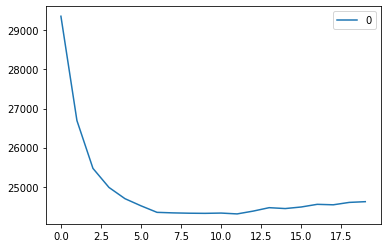

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
all_jobs_knn = all_jobs_knn_grid.best_estimator_
all_jobs_knn.fit(X_train, y_train)

#cross validate
all_jobs_knn_scores = cross_val_score(all_jobs_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53430131 0.4477553  0.45642075 0.45996017 0.46646409]
Mean Cross Validation Score: 0.472980324379519145860939488557051


In [ ]:
#generate predictions
all_jobs_knn_preds = all_jobs_knn.predict(X_test)

#more performance metrics
all_jobs_knn_rsquared_train = all_jobs_knn.score(X_train, y_train)
all_jobs_knn_rsquared_test = all_jobs_knn.score(X_test, y_test)
all_jobs_knn_mae = mean_absolute_error(y_test, all_jobs_knn_preds)
all_jobs_knn_mse = mse(y_test, all_jobs_knn_preds)
all_jobs_knn_rmse = rmse(y_test, all_jobs_knn_preds)
all_jobs_knn_mape = np.mean(np.abs((y_test - all_jobs_knn_preds)/y_test)*100)
all_jobs_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_knn_preds) / y_test)))) * 100
all_jobs_knn_model_name = 'All Jobs KNN'

#create easily readable display of performance metrics
all_jobs_knn_dictionary = {'Model': all_jobs_knn_model_name,
  'Training Set R Squared': all_jobs_knn_rsquared_train, 
  'Test Set R Squared': all_jobs_knn_rsquared_test, 'Mean Absolute Error': all_jobs_knn_mae, 
  'Mean Sqaured Error': all_jobs_knn_mse, 'Root Mean Squared Error': all_jobs_knn_rmse,
  'Root Mean Squared Percentage Error': all_jobs_knn_rmspe,
  'Mean Absolute Percentage Error': all_jobs_knn_mape}

all_jobs_knn_df = pd.DataFrame(all_jobs_knn_dictionary, index=[0])

all_jobs_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs KNN,0.978248,0.513091,16963.214847,5.914709e+08,24320.174548,25.630008,18.177122


### **all_jobs_yrs_df**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
years_exp_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
years_exp_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(years_exp_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(years_exp_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   33.2s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  29941.96958373299
RMSe Value for K=  2 is  26660.637179950463
RMSe Value for K=  3 is  25203.604903519034
RMSe Value for K=  4 is  24517.966686765274
RMSe Value for K=  5 is  24102.355593981825
RMSe Value for K=  6 is  24078.712064891515
RMSe Value for K=  7 is  23969.61564084059
RMSe Value for K=  8 is  24039.571380809964
RMSe Value for K=  9 is  23887.02847992892
RMSe Value for K=  10 is  23922.314905486783
RMSe Value for K=  11 is  23900.91497264533
RMSe Value for K=  12 is  23961.486123117425
RMSe Value for K=  13 is  23880.637894372623
RMSe Value for K=  14 is  23830.42335723709
RMSe Value for K=  15 is  23896.685252452924
RMSe Value for K=  16 is  23923.25142975976
RMSe Value for K=  17 is  23909.658333501906
RMSe Value for K=  18 is  23896.569824159684
RMSe Value for K=  19 is  23935.87213939466
RMSe Value for K=  20 is  23980.55857623829


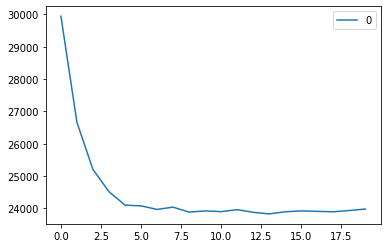

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
years_exp_knn = years_exp_knn_grid.best_estimator_

years_exp_knn.fit(X_train, y_train)

#cross validate
years_exp_knn_scores = cross_val_score(years_exp_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', years_exp_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(years_exp_knn_scores)))

Accuracy Scores for the 5 folds:  [0.4796951  0.47928572 0.4901582  0.45597516 0.46214704]
Mean Cross Validation Score: 0.473452243825361218654279582551681


In [ ]:
#generate predictions
years_exp_knn_preds = years_exp_knn.predict(X_test)

#more performance metrics
years_exp_knn_rsquared_train = years_exp_knn.score(X_train, y_train)
years_exp_knn_rsquared_test = years_exp_knn.score(X_test, y_test)
years_exp_knn_mae = mean_absolute_error(y_test, years_exp_knn_preds)
years_exp_knn_mse = mse(y_test, years_exp_knn_preds)
years_exp_knn_rmse = rmse(y_test, years_exp_knn_preds)
years_exp_knn_mape = np.mean(np.abs((y_test - years_exp_knn_preds)/y_test)*100)
years_exp_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - years_exp_knn_preds) / y_test)))) * 100
years_exp_knn_model_name = 'All Jobs Years of Experience KNN'

#create easily readable display of performance metrics
years_exp_knn_dictionary = {'Model': years_exp_knn_model_name,
  'Training Set R Squared': years_exp_knn_rsquared_train, 
  'Test Set R Squared': years_exp_knn_rsquared_test, 'Mean Absolute Error': years_exp_knn_mae, 
  'Mean Sqaured Error': years_exp_knn_mse, 'Root Mean Squared Error': years_exp_knn_rmse,
  'Root Mean Squared Percentage Error': years_exp_knn_rmspe,
  'Mean Absolute Percentage Error': years_exp_knn_mape}

years_exp_knn_df = pd.DataFrame(years_exp_knn_dictionary, index=[0])

years_exp_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience KNN,0.978606,0.522926,16416.984156,5.710516e+08,23896.685252,26.075698,18.22282


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_all_jobs_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_all_jobs_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   44.1s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.30663377295454014
RMSe Value for K=  2 is  0.27749608647477253
RMSe Value for K=  3 is  0.26465276558527445
RMSe Value for K=  4 is  0.2592520491957495
RMSe Value for K=  5 is  0.25558685531043834
RMSe Value for K=  6 is  0.2536642934203168
RMSe Value for K=  7 is  0.2509747787192593
RMSe Value for K=  8 is  0.2503399250391465
RMSe Value for K=  9 is  0.25060762291728916
RMSe Value for K=  10 is  0.250586023352726
RMSe Value for K=  11 is  0.25082791090131806
RMSe Value for K=  12 is  0.2501221316135963
RMSe Value for K=  13 is  0.25043461377008397
RMSe Value for K=  14 is  0.2510435729038872
RMSe Value for K=  15 is  0.250649540721206
RMSe Value for K=  16 is  0.25087814487254645
RMSe Value for K=  17 is  0.2511844869781519
RMSe Value for K=  18 is  0.2508360468636841
RMSe Value for K=  19 is  0.25149907442746755
RMSe Value for K=  20 is  0.2515607560678765


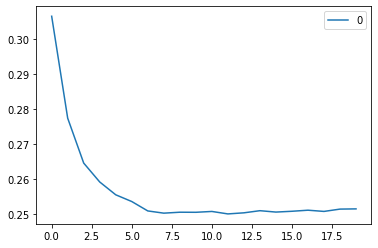

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_knn = log_all_jobs_knn_grid.best_estimator_

log_all_jobs_knn.fit(X_train, y_train)

#cross validate
log_all_jobs_knn_scores = cross_val_score(log_all_jobs_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53910365 0.4731321  0.48735911 0.49827541 0.47842612]
Mean Cross Validation Score: 0.495259278809134617649334586531040


In [ ]:
#generate predictions
log_all_jobs_knn_preds = log_all_jobs_knn.predict(X_test)

#more performance metrics
log_all_jobs_knn_rsquared_train = log_all_jobs_knn.score(X_train, y_train)
log_all_jobs_knn_rsquared_test = log_all_jobs_knn.score(X_test, y_test)
log_all_jobs_knn_mae = mean_absolute_error(y_test, log_all_jobs_knn_preds)
log_all_jobs_knn_mse = mse(y_test, log_all_jobs_knn_preds)
log_all_jobs_knn_rmse = rmse(y_test, log_all_jobs_knn_preds)
log_all_jobs_knn_mape = np.mean(np.abs((y_test - log_all_jobs_knn_preds)/y_test)*100)
log_all_jobs_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_knn_preds) / y_test)))) * 100
log_all_jobs_knn_model_name = 'All Jobs KNN Log(y)'

#create easily readable display of performance metrics
log_all_jobs_knn_dictionary = {'Model': log_all_jobs_knn_model_name,
  'Training Set R Squared': log_all_jobs_knn_rsquared_train, 
  'Test Set R Squared': log_all_jobs_knn_rsquared_test, 'Mean Absolute Error': log_all_jobs_knn_mae, 
  'Mean Sqaured Error': log_all_jobs_knn_mse, 'Root Mean Squared Error': log_all_jobs_knn_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_knn_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_knn_mape}

log_all_jobs_knn_df = pd.DataFrame(log_all_jobs_knn_dictionary, index=[0])

log_all_jobs_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs KNN Log(y),0.983852,0.514029,0.184438,0.062561,0.250122,2.183078,1.613161


### **all_jobs_yrs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_years_exp_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_years_exp_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_years_exp_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_years_exp_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   33.2s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.30343194204268514
RMSe Value for K=  2 is  0.2696473652472737
RMSe Value for K=  3 is  0.25314073388800384
RMSe Value for K=  4 is  0.24770815035472274
RMSe Value for K=  5 is  0.24402999021781083
RMSe Value for K=  6 is  0.243614162583054
RMSe Value for K=  7 is  0.24300104622175855
RMSe Value for K=  8 is  0.24291059755181135
RMSe Value for K=  9 is  0.24186021219778855
RMSe Value for K=  10 is  0.24211779203162384
RMSe Value for K=  11 is  0.24197778282957888
RMSe Value for K=  12 is  0.24225979767968517
RMSe Value for K=  13 is  0.241372731982479
RMSe Value for K=  14 is  0.24086082718678894
RMSe Value for K=  15 is  0.24104974222932976
RMSe Value for K=  16 is  0.24107561478016257
RMSe Value for K=  17 is  0.24095865682880588
RMSe Value for K=  18 is  0.2404689451321077
RMSe Value for K=  19 is  0.24099633708466286
RMSe Value for K=  20 is  0.24152416541325478


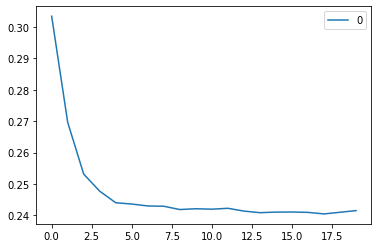

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_years_exp_knn = log_years_exp_knn_grid.best_estimator_

log_years_exp_knn.fit(X_train, y_train)

#cross validate
log_years_exp_knn_scores = cross_val_score(log_years_exp_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_years_exp_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_years_exp_knn_scores)))

Accuracy Scores for the 5 folds:  [0.50514615 0.50022802 0.50024998 0.49020148 0.48851032]
Mean Cross Validation Score: 0.496867188696599626496208657044917


In [ ]:
#generate predictions
log_years_exp_knn_preds = log_years_exp_knn.predict(X_test)

#more performance metrics
log_years_exp_knn_rsquared_train = log_years_exp_knn.score(X_train, y_train)
log_years_exp_knn_rsquared_test = log_years_exp_knn.score(X_test, y_test)
log_years_exp_knn_mae = mean_absolute_error(y_test, log_years_exp_knn_preds)
log_years_exp_knn_mse = mse(y_test, log_years_exp_knn_preds)
log_years_exp_knn_rmse = rmse(y_test, log_years_exp_knn_preds)
log_years_exp_knn_mape = np.mean(np.abs((y_test - log_years_exp_knn_preds)/y_test)*100)
log_years_exp_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_years_exp_knn_preds) / y_test)))) * 100
log_years_exp_knn_model_name = 'All Jobs Years of Experience KNN Log(y)'

#create easily readable display of performance metrics
log_years_exp_knn_dictionary = {'Model': log_years_exp_knn_model_name,
  'Training Set R Squared': log_years_exp_knn_rsquared_train, 
  'Test Set R Squared': log_years_exp_knn_rsquared_test, 'Mean Absolute Error': log_years_exp_knn_mae, 
  'Mean Sqaured Error': log_years_exp_knn_mse, 'Root Mean Squared Error': log_years_exp_knn_rmse,
  'Root Mean Squared Percentage Error': log_years_exp_knn_rmspe,
  'Mean Absolute Percentage Error': log_years_exp_knn_mape}

log_years_exp_knn_df = pd.DataFrame(log_years_exp_knn_dictionary, index=[0])

log_years_exp_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience KNN Log(y),0.982977,0.555099,0.177807,0.058105,0.24105,2.113499,1.560338


### **all_jobs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
all_jobs_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
all_jobs_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   42.9s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  29037.437915872208
RMSe Value for K=  2 is  25435.85806335627
RMSe Value for K=  3 is  23917.81689953105
RMSe Value for K=  4 is  23217.388648931224
RMSe Value for K=  5 is  22954.795535944926
RMSe Value for K=  6 is  22638.142669011744
RMSe Value for K=  7 is  22552.74685223413
RMSe Value for K=  8 is  22376.328819463728
RMSe Value for K=  9 is  22385.930167732542
RMSe Value for K=  10 is  22412.627757220976
RMSe Value for K=  11 is  22381.590989227236
RMSe Value for K=  12 is  22372.57595945956
RMSe Value for K=  13 is  22355.18062490014
RMSe Value for K=  14 is  22408.065999373503
RMSe Value for K=  15 is  22470.95095475113
RMSe Value for K=  16 is  22475.12277658952
RMSe Value for K=  17 is  22470.798868631166
RMSe Value for K=  18 is  22527.707521843542
RMSe Value for K=  19 is  22538.82309647417
RMSe Value for K=  20 is  22597.42682562395


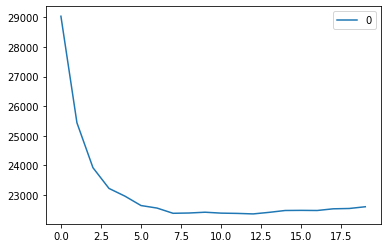

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
all_jobs_no_outliers_knn = all_jobs_no_outliers_knn_grid.best_estimator_

all_jobs_no_outliers_knn.fit(X_train, y_train)

#cross validate
all_jobs_no_outliers_knn_scores = cross_val_score(all_jobs_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.5368415  0.4648126  0.5276647  0.47237169 0.47786286]
Mean Cross Validation Score: 0.495910670790875141022979732952081


In [ ]:
#generate predictions
all_jobs_no_outliers_knn_preds = all_jobs_no_outliers_knn.predict(X_test)

#more performance metrics
all_jobs_no_outliers_knn_rsquared_train = all_jobs_no_outliers_knn.score(X_train, y_train)
all_jobs_no_outliers_knn_rsquared_test = all_jobs_no_outliers_knn.score(X_test, y_test)
all_jobs_no_outliers_knn_mae = mean_absolute_error(y_test, all_jobs_no_outliers_knn_preds)
all_jobs_no_outliers_knn_mse = mse(y_test, all_jobs_no_outliers_knn_preds)
all_jobs_no_outliers_knn_rmse = rmse(y_test, all_jobs_no_outliers_knn_preds)
all_jobs_no_outliers_knn_mape = np.mean(np.abs((y_test - all_jobs_no_outliers_knn_preds)/y_test)*100)
all_jobs_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_no_outliers_knn_preds) / y_test)))) * 100
all_jobs_no_outliers_knn_model_name = 'All Jobs w/o Outliers KNN'

#create easily readable display of performance metrics
all_jobs_no_outliers_knn_dictionary = {'Model': all_jobs_no_outliers_knn_model_name,
  'Training Set R Squared': all_jobs_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': all_jobs_no_outliers_knn_rsquared_test, 'Mean Absolute Error': all_jobs_no_outliers_knn_mae, 
  'Mean Sqaured Error': all_jobs_no_outliers_knn_mse, 'Root Mean Squared Error': all_jobs_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': all_jobs_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': all_jobs_no_outliers_knn_mape}

all_jobs_no_outliers_knn_df = pd.DataFrame(all_jobs_no_outliers_knn_dictionary, index=[0])

all_jobs_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers KNN,0.985277,0.510241,16376.142667,5.049436e+08,22470.950955,26.098671,18.409429


### **all_jobs_yrs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
years_exp_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
years_exp_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(years_exp_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(years_exp_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   32.6s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  28686.334947180512
RMSe Value for K=  2 is  24737.500614707867
RMSe Value for K=  3 is  23955.87745071283
RMSe Value for K=  4 is  23742.091470565436
RMSe Value for K=  5 is  23474.854732924006
RMSe Value for K=  6 is  23148.02219084835
RMSe Value for K=  7 is  22987.082548725535
RMSe Value for K=  8 is  22746.74509875313
RMSe Value for K=  9 is  22652.209491910995
RMSe Value for K=  10 is  22664.723066969742
RMSe Value for K=  11 is  22550.58182483992
RMSe Value for K=  12 is  22507.24744818197
RMSe Value for K=  13 is  22434.066455690016
RMSe Value for K=  14 is  22376.948419255637
RMSe Value for K=  15 is  22437.97445763348
RMSe Value for K=  16 is  22425.031492816302
RMSe Value for K=  17 is  22388.11929939296
RMSe Value for K=  18 is  22341.132001925613
RMSe Value for K=  19 is  22343.93601872469
RMSe Value for K=  20 is  22370.478538947053


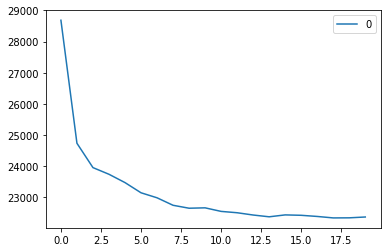

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
years_exp_no_outliers_knn = years_exp_no_outliers_knn_grid.best_estimator_

years_exp_no_outliers_knn.fit(X_train, y_train)

#cross validate
years_exp_no_outliers_knn_scores = cross_val_score(years_exp_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', years_exp_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(years_exp_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.52104991 0.52733793 0.52029251 0.43777891 0.54624222]
Mean Cross Validation Score: 0.510540297484062044475194852566347


In [ ]:
#generate predictions
years_exp_no_outliers_knn_preds = years_exp_no_outliers_knn.predict(X_test)

#more performance metrics
years_exp_no_outliers_knn_rsquared_train = years_exp_no_outliers_knn.score(X_train, y_train)
years_exp_no_outliers_knn_rsquared_test = years_exp_no_outliers_knn.score(X_test, y_test)
years_exp_no_outliers_knn_mae = mean_absolute_error(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_mse = mse(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_rmse = rmse(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_mape = np.mean(np.abs((y_test - years_exp_no_outliers_knn_preds)/y_test)*100)
years_exp_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - years_exp_no_outliers_knn_preds) / y_test)))) * 100
years_exp_no_outliers_knn_model_name = 'All Jobs Years of Experience w/o Outliers KNN'

#create easily readable display of performance metrics
years_exp_no_outliers_knn_dictionary = {'Model': years_exp_no_outliers_knn_model_name,
  'Training Set R Squared': years_exp_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': years_exp_no_outliers_knn_rsquared_test, 'Mean Absolute Error': years_exp_no_outliers_knn_mae, 
  'Mean Sqaured Error': years_exp_no_outliers_knn_mse, 'Root Mean Squared Error': years_exp_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': years_exp_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': years_exp_no_outliers_knn_mape}

years_exp_no_outliers_knn_df = pd.DataFrame(years_exp_no_outliers_knn_dictionary, index=[0])

years_exp_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers KNN,0.98539,0.456964,16025.831462,5.174144e+08,22746.745099,24.489349,17.424402


### **all_jobs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_all_jobs_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_all_jobs_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   43.2s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.3164479183033038
RMSe Value for K=  2 is  0.2782040124197313
RMSe Value for K=  3 is  0.2613211826638708
RMSe Value for K=  4 is  0.2536863345737399
RMSe Value for K=  5 is  0.25072043287072276
RMSe Value for K=  6 is  0.24760613321735805
RMSe Value for K=  7 is  0.2467801440309563
RMSe Value for K=  8 is  0.24441115069111433
RMSe Value for K=  9 is  0.24456434499610147
RMSe Value for K=  10 is  0.2453014592240169
RMSe Value for K=  11 is  0.244830174005126
RMSe Value for K=  12 is  0.24466021527176043
RMSe Value for K=  13 is  0.2443853348255541
RMSe Value for K=  14 is  0.244718503743811
RMSe Value for K=  15 is  0.24528152618332336
RMSe Value for K=  16 is  0.24537043133661243
RMSe Value for K=  17 is  0.24488087243274914
RMSe Value for K=  18 is  0.24543476425971755
RMSe Value for K=  19 is  0.24546208247231527
RMSe Value for K=  20 is  0.2459912802631092


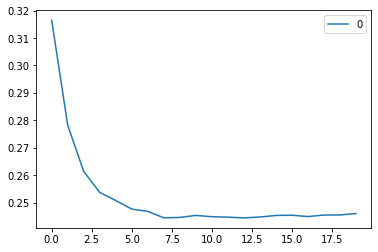

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_no_outliers_knn = log_all_jobs_no_outliers_knn_grid.best_estimator_

log_all_jobs_no_outliers_knn.fit(X_train, y_train)

#cross validate
log_all_jobs_no_outliers_knn_scores = cross_val_score(log_all_jobs_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53954131 0.45753333 0.52441983 0.48135386 0.48609649]
Mean Cross Validation Score: 0.497788964340389217255733456113376


In [ ]:
#generate predictions
log_all_jobs_no_outliers_knn_preds = log_all_jobs_no_outliers_knn.predict(X_test)

#more performance metrics
log_all_jobs_no_outliers_knn_rsquared_train = log_all_jobs_no_outliers_knn.score(X_train, y_train)
log_all_jobs_no_outliers_knn_rsquared_test = log_all_jobs_no_outliers_knn.score(X_test, y_test)
log_all_jobs_no_outliers_knn_mae = mean_absolute_error(y_test, log_all_jobs_no_outliers_knn_preds)
log_all_jobs_no_outliers_knn_mse = mse(y_test, log_all_jobs_no_outliers_knn_preds)
log_all_jobs_no_outliers_knn_rmse = rmse(y_test, log_all_jobs_no_outliers_knn_preds)
log_all_jobs_no_outliers_knn_mape = np.mean(np.abs((y_test - log_all_jobs_no_outliers_knn_preds)/y_test)*100)
log_all_jobs_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_no_outliers_knn_preds) / y_test)))) * 100
log_all_jobs_no_outliers_knn_model_name = 'All Jobs w/o Outliers KNN Log(y)'

#create easily readable display of performance metrics
log_all_jobs_no_outliers_knn_dictionary = {'Model': log_all_jobs_no_outliers_knn_model_name,
  'Training Set R Squared': log_all_jobs_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': log_all_jobs_no_outliers_knn_rsquared_test, 'Mean Absolute Error': log_all_jobs_no_outliers_knn_mae, 
  'Mean Sqaured Error': log_all_jobs_no_outliers_knn_mse, 'Root Mean Squared Error': log_all_jobs_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_no_outliers_knn_mape}

log_all_jobs_no_outliers_knn_df = pd.DataFrame(log_all_jobs_no_outliers_knn_dictionary, index=[0])

log_all_jobs_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers KNN Log(y),0.986725,0.491891,0.183703,0.060163,0.245282,2.154334,1.611869


### **all_jobs_yrs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_years_exp_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_years_exp_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_years_exp_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_years_exp_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   32.5s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.3031441423875988
RMSe Value for K=  2 is  0.26089774931787624
RMSe Value for K=  3 is  0.2512898627771158
RMSe Value for K=  4 is  0.24892749137828618
RMSe Value for K=  5 is  0.24535141854956125
RMSe Value for K=  6 is  0.24312754461719877
RMSe Value for K=  7 is  0.24091312101290982
RMSe Value for K=  8 is  0.2387450551418904
RMSe Value for K=  9 is  0.23771498581467948
RMSe Value for K=  10 is  0.23770797305430538
RMSe Value for K=  11 is  0.2370006644771886
RMSe Value for K=  12 is  0.23673684607642517
RMSe Value for K=  13 is  0.2359843578088902
RMSe Value for K=  14 is  0.23514069367947296
RMSe Value for K=  15 is  0.2356957061630618
RMSe Value for K=  16 is  0.23551379756222515
RMSe Value for K=  17 is  0.2350051041427948
RMSe Value for K=  18 is  0.23448546148863036
RMSe Value for K=  19 is  0.23434687347049016
RMSe Value for K=  20 is  0.23445935697098788


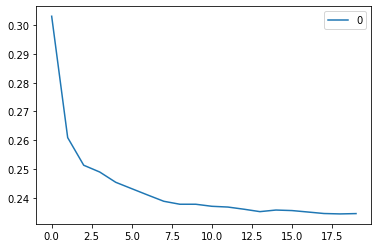

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_years_exp_no_outliers_knn = log_years_exp_no_outliers_knn_grid.best_estimator_

log_years_exp_no_outliers_knn.fit(X_train, y_train)

#cross validate
log_years_exp_no_outliers_knn_scores = cross_val_score(log_years_exp_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_years_exp_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_years_exp_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53623275 0.52996098 0.51625196 0.4197201  0.52892117]
Mean Cross Validation Score: 0.506217391871957134164006220089504


In [ ]:
#generate predictions
log_years_exp_no_outliers_knn_preds = log_years_exp_no_outliers_knn.predict(X_test)

#more performance metrics
log_years_exp_no_outliers_knn_rsquared_train = log_years_exp_no_outliers_knn.score(X_train, y_train)
log_years_exp_no_outliers_knn_rsquared_test = log_years_exp_no_outliers_knn.score(X_test, y_test)
log_years_exp_no_outliers_knn_mae = mean_absolute_error(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_mse = mse(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_rmse = rmse(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_mape = np.mean(np.abs((y_test - log_years_exp_no_outliers_knn_preds)/y_test)*100)
log_years_exp_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_years_exp_no_outliers_knn_preds) / y_test)))) * 100
log_years_exp_no_outliers_knn_model_name = 'All Jobs Years of Experience w/o Outliers KNN Log(y)'

#create easily readable display of performance metrics
log_years_exp_no_outliers_knn_dictionary = {'Model': log_years_exp_no_outliers_knn_model_name,
  'Training Set R Squared': log_years_exp_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': log_years_exp_no_outliers_knn_rsquared_test, 'Mean Absolute Error': log_years_exp_no_outliers_knn_mae, 
  'Mean Sqaured Error': log_years_exp_no_outliers_knn_mse, 'Root Mean Squared Error': log_years_exp_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': log_years_exp_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': log_years_exp_no_outliers_knn_mape}

log_years_exp_no_outliers_knn_df = pd.DataFrame(log_years_exp_no_outliers_knn_dictionary, index=[0])

log_years_exp_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers KNN ...,0.986351,0.482157,0.174185,0.056999,0.238745,2.084524,1.5248


## **Random Forest**

### **all_jobs_df**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [43]}  
  
# all_jobs_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# all_jobs_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(all_jobs_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(all_jobs_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
all_jobs_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

all_jobs_rf.fit(X_train, y_train)

#cross validate
all_jobs_rf_scores = cross_val_score(all_jobs_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_rf_scores)))

Accuracy Scores for the 5 folds:  [0.60188166 0.57671562 0.55211679 0.53510756 0.54954055]
Mean Cross Validation Score: 0.563072435763441014877628276735777


In [ ]:
#generate predictions
all_jobs_rf_preds = all_jobs_rf.predict(X_test)

#more performance metrics
all_jobs_rf_rsquared_train = all_jobs_rf.score(X_train, y_train)
all_jobs_rf_rsquared_test = all_jobs_rf.score(X_test, y_test)
all_jobs_rf_mae = mean_absolute_error(y_test, all_jobs_rf_preds)
all_jobs_rf_mse = mse(y_test, all_jobs_rf_preds)
all_jobs_rf_rmse = rmse(y_test, all_jobs_rf_preds)
all_jobs_rf_mape = np.mean(np.abs((y_test - all_jobs_rf_preds)/y_test)*100)
all_jobs_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_rf_preds) / y_test)))) * 100
all_jobs_rf_model_name = 'All Jobs Random Forest'

#create easily readable display of performance metrics
all_jobs_rf_dictionary = {'Model': all_jobs_rf_model_name,
  'Training Set R Squared': all_jobs_rf_rsquared_train, 
  'Test Set R Squared': all_jobs_rf_rsquared_test, 'Mean Absolute Error': all_jobs_rf_mae, 
  'Mean Sqaured Error': all_jobs_rf_mse, 'Root Mean Squared Error': all_jobs_rf_rmse,
  'Root Mean Squared Percentage Error': all_jobs_rf_rmspe,
  'Mean Absolute Percentage Error': all_jobs_rf_mape}

all_jobs_rf_df = pd.DataFrame(all_jobs_rf_dictionary, index=[0])

all_jobs_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Random Forest,0.931042,0.613098,15461.700637,4.699873e+08,21679.190539,24.19034,17.096554


### **all_jobs_yrs_df**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# all_jobs_yrs_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# all_jobs_yrs_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(all_jobs_yrs_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(all_jobs_yrs_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

all_jobs_yrs_rf.fit(X_train, y_train)

#cross validate
all_jobs_yrs_rf_scores = cross_val_score(all_jobs_yrs_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_rf_scores)))

Accuracy Scores for the 5 folds:  [0.56003877 0.55722982 0.60216534 0.53297045 0.56252078]
Mean Cross Validation Score: 0.562985033332474182898863546142820


In [ ]:
#generate predictions
all_jobs_yrs_rf_preds = all_jobs_yrs_rf.predict(X_test)

#more performance metrics
all_jobs_yrs_rf_rsquared_train = all_jobs_yrs_rf.score(X_train, y_train)
all_jobs_yrs_rf_rsquared_test = all_jobs_yrs_rf.score(X_test, y_test)
all_jobs_yrs_rf_mae = mean_absolute_error(y_test, all_jobs_yrs_rf_preds)
all_jobs_yrs_rf_mse = mse(y_test, all_jobs_yrs_rf_preds)
all_jobs_yrs_rf_rmse = rmse(y_test, all_jobs_yrs_rf_preds)
all_jobs_yrs_rf_mape = np.mean(np.abs((y_test - all_jobs_yrs_rf_preds)/y_test)*100)
all_jobs_yrs_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_rf_preds) / y_test)))) * 100
all_jobs_yrs_rf_model_name = 'All Jobs Years of Experience Random Forest'

#create easily readable display of performance metrics
all_jobs_yrs_rf_dictionary = {'Model': all_jobs_yrs_rf_model_name,
  'Training Set R Squared': all_jobs_yrs_rf_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_rf_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_rf_mae, 
  'Mean Sqaured Error': all_jobs_yrs_rf_mse, 'Root Mean Squared Error': all_jobs_yrs_rf_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_rf_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_rf_mape}

all_jobs_yrs_rf_df = pd.DataFrame(all_jobs_yrs_rf_dictionary, index=[0])

all_jobs_yrs_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Random Forest,0.931459,0.604564,15195.778894,4.733316e+08,21756.184563,25.608721,17.549229


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_all_jobs_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_all_jobs_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_all_jobs_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_all_jobs_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_all_jobs_rf.fit(X_train, y_train)

#cross validate
log_all_jobs_rf_scores = cross_val_score(log_all_jobs_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_rf_scores)))

Accuracy Scores for the 5 folds:  [0.60524476 0.5894771  0.57751997 0.58431837 0.57436052]
Mean Cross Validation Score: 0.586184146092064706223823122854810


In [ ]:
#generate predictions
log_all_jobs_rf_preds = log_all_jobs_rf.predict(X_test)

#more performance metrics
log_all_jobs_rf_rsquared_train = log_all_jobs_rf.score(X_train, y_train)
log_all_jobs_rf_rsquared_test = log_all_jobs_rf.score(X_test, y_test)
log_all_jobs_rf_mae = mean_absolute_error(y_test, log_all_jobs_rf_preds)
log_all_jobs_rf_mse = mse(y_test, log_all_jobs_rf_preds)
log_all_jobs_rf_rmse = rmse(y_test, log_all_jobs_rf_preds)
log_all_jobs_rf_mape = np.mean(np.abs((y_test - log_all_jobs_rf_preds)/y_test)*100)
log_all_jobs_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_rf_preds) / y_test)))) * 100
log_all_jobs_rf_model_name = 'All Jobs Random Forest Log(y)'

#create easily readable display of performance metrics
log_all_jobs_rf_dictionary = {'Model': log_all_jobs_rf_model_name,
  'Training Set R Squared': log_all_jobs_rf_rsquared_train, 
  'Test Set R Squared': log_all_jobs_rf_rsquared_test, 'Mean Absolute Error': log_all_jobs_rf_mae, 
  'Mean Sqaured Error': log_all_jobs_rf_mse, 'Root Mean Squared Error': log_all_jobs_rf_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_rf_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_rf_mape}

log_all_jobs_rf_df = pd.DataFrame(log_all_jobs_rf_dictionary, index=[0])

log_all_jobs_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Random Forest Log(y),0.939331,0.619677,0.164527,0.048961,0.22127,1.942475,1.443114


### **all_jobs_yrs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_all_jobs_yrs_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_all_jobs_yrs_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_all_jobs_yrs_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_all_jobs_yrs_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_all_jobs_yrs_rf.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_rf_scores = cross_val_score(log_all_jobs_yrs_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_rf_scores)))

Accuracy Scores for the 5 folds:  [0.5830257  0.58005718 0.60783047 0.57688264 0.5818461 ]
Mean Cross Validation Score: 0.585928418946343732010006988275563


In [ ]:
#generate predictions
log_all_jobs_yrs_rf_preds = log_all_jobs_yrs_rf.predict(X_test)

#more performance metrics
log_all_jobs_yrs_rf_rsquared_train = log_all_jobs_yrs_rf.score(X_train, y_train)
log_all_jobs_yrs_rf_rsquared_test = log_all_jobs_yrs_rf.score(X_test, y_test)
log_all_jobs_yrs_rf_mae = mean_absolute_error(y_test, log_all_jobs_yrs_rf_preds)
log_all_jobs_yrs_rf_mse = mse(y_test, log_all_jobs_yrs_rf_preds)
log_all_jobs_yrs_rf_rmse = rmse(y_test, log_all_jobs_yrs_rf_preds)
log_all_jobs_yrs_rf_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_rf_preds)/y_test)*100)
log_all_jobs_yrs_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_rf_preds) / y_test)))) * 100
log_all_jobs_yrs_rf_model_name = 'All Jobs Years of Experience Random Forest Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_rf_dictionary = {'Model': log_all_jobs_yrs_rf_model_name,
  'Training Set R Squared': log_all_jobs_yrs_rf_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_rf_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_rf_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_rf_mse, 'Root Mean Squared Error': log_all_jobs_yrs_rf_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_rf_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_rf_mape}

log_all_jobs_yrs_rf_df = pd.DataFrame(log_all_jobs_yrs_rf_dictionary, index=[0])

log_all_jobs_yrs_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience Random Forest Log(y),0.939052,0.633749,0.160351,0.047833,0.218708,1.931527,1.412132


### **all_jobs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [43]}  
  
# all_jobs_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# all_jobs_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(all_jobs_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(all_jobs_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
all_jobs_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

all_jobs_no_outliers_rf.fit(X_train, y_train)

#cross validate
all_jobs_no_outliers_rf_scores = cross_val_score(all_jobs_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.61816498 0.58715945 0.6199611  0.56266905 0.58837125]
Mean Cross Validation Score: 0.595265165393835338214501007314539


In [ ]:
#generate predictions
all_jobs_no_outliers_rf_preds = all_jobs_no_outliers_rf.predict(X_test)

#more performance metrics
all_jobs_no_outliers_rf_rsquared_train = all_jobs_no_outliers_rf.score(X_train, y_train)
all_jobs_no_outliers_rf_rsquared_test = all_jobs_no_outliers_rf.score(X_test, y_test)
all_jobs_no_outliers_rf_mae = mean_absolute_error(y_test, all_jobs_no_outliers_rf_preds)
all_jobs_no_outliers_rf_mse = mse(y_test, all_jobs_no_outliers_rf_preds)
all_jobs_no_outliers_rf_rmse = rmse(y_test, all_jobs_no_outliers_rf_preds)
all_jobs_no_outliers_rf_mape = np.mean(np.abs((y_test - all_jobs_no_outliers_rf_preds)/y_test)*100)
all_jobs_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_no_outliers_rf_preds) / y_test)))) * 100
all_jobs_no_outliers_rf_model_name = 'All Jobs w/o Outliers Random Forest'

#create easily readable display of performance metrics
all_jobs_no_outliers_rf_dictionary = {'Model': all_jobs_no_outliers_rf_model_name,
  'Training Set R Squared': all_jobs_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': all_jobs_no_outliers_rf_rsquared_test, 'Mean Absolute Error': all_jobs_no_outliers_rf_mae, 
  'Mean Sqaured Error': all_jobs_no_outliers_rf_mse, 'Root Mean Squared Error': all_jobs_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': all_jobs_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': all_jobs_no_outliers_rf_mape}

all_jobs_no_outliers_rf_df = pd.DataFrame(all_jobs_no_outliers_rf_dictionary, index=[0])

all_jobs_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Random Forest,0.941858,0.619748,14709.082953,3.920407e+08,19800.018064,24.332945,17.199059


### **all_jobs_yrs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# all_jobs_yrs_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# all_jobs_yrs_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(all_jobs_yrs_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(all_jobs_yrs_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

all_jobs_yrs_no_outliers_rf.fit(X_train, y_train)

#cross validate
all_jobs_yrs_no_outliers_rf_scores = cross_val_score(all_jobs_yrs_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.59670282 0.61431925 0.61757851 0.54426034 0.62106007]
Mean Cross Validation Score: 0.598784198455064253785451455769362


In [ ]:
#generate predictions
all_jobs_yrs_no_outliers_rf_preds = all_jobs_yrs_no_outliers_rf.predict(X_test)

#more performance metrics
all_jobs_yrs_no_outliers_rf_rsquared_train = all_jobs_yrs_no_outliers_rf.score(X_train, y_train)
all_jobs_yrs_no_outliers_rf_rsquared_test = all_jobs_yrs_no_outliers_rf.score(X_test, y_test)
all_jobs_yrs_no_outliers_rf_mae = mean_absolute_error(y_test, all_jobs_yrs_no_outliers_rf_preds)
all_jobs_yrs_no_outliers_rf_mse = mse(y_test, all_jobs_yrs_no_outliers_rf_preds)
all_jobs_yrs_no_outliers_rf_rmse = rmse(y_test, all_jobs_yrs_no_outliers_rf_preds)
all_jobs_yrs_no_outliers_rf_mape = np.mean(np.abs((y_test - all_jobs_yrs_no_outliers_rf_preds)/y_test)*100)
all_jobs_yrs_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_no_outliers_rf_preds) / y_test)))) * 100
all_jobs_yrs_no_outliers_rf_model_name = 'All Jobs Years of Experience w/o Outliers Random Forest'

#create easily readable display of performance metrics
all_jobs_yrs_no_outliers_rf_dictionary = {'Model': all_jobs_yrs_no_outliers_rf_model_name,
  'Training Set R Squared': all_jobs_yrs_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_no_outliers_rf_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_no_outliers_rf_mae, 
  'Mean Sqaured Error': all_jobs_yrs_no_outliers_rf_mse, 'Root Mean Squared Error': all_jobs_yrs_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_no_outliers_rf_mape}

all_jobs_yrs_no_outliers_rf_df = pd.DataFrame(all_jobs_yrs_no_outliers_rf_dictionary, index=[0])

all_jobs_yrs_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Rand...,0.940204,0.584606,14447.645633,3.957948e+08,19894.591093,24.181468,16.5112


### **all_jobs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_all_jobs_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_all_jobs_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_all_jobs_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_all_jobs_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_all_jobs_no_outliers_rf.fit(X_train, y_train)

#cross validate
log_all_jobs_no_outliers_rf_scores = cross_val_score(log_all_jobs_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.61504992 0.57939622 0.62320422 0.57183822 0.59568706]
Mean Cross Validation Score: 0.597035128125727565517877337697428


In [ ]:
#generate predictions
log_all_jobs_no_outliers_rf_preds = log_all_jobs_no_outliers_rf.predict(X_test)

#more performance metrics
log_all_jobs_no_outliers_rf_rsquared_train = log_all_jobs_no_outliers_rf.score(X_train, y_train)
log_all_jobs_no_outliers_rf_rsquared_test = log_all_jobs_no_outliers_rf.score(X_test, y_test)
log_all_jobs_no_outliers_rf_mae = mean_absolute_error(y_test, log_all_jobs_no_outliers_rf_preds)
log_all_jobs_no_outliers_rf_mse = mse(y_test, log_all_jobs_no_outliers_rf_preds)
log_all_jobs_no_outliers_rf_rmse = rmse(y_test, log_all_jobs_no_outliers_rf_preds)
log_all_jobs_no_outliers_rf_mape = np.mean(np.abs((y_test - log_all_jobs_no_outliers_rf_preds)/y_test)*100)
log_all_jobs_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_no_outliers_rf_preds) / y_test)))) * 100
log_all_jobs_no_outliers_rf_model_name = 'All Jobs w/o Outliers Random Forest Log(y)'

#create easily readable display of performance metrics
log_all_jobs_no_outliers_rf_dictionary = {'Model': log_all_jobs_no_outliers_rf_model_name,
  'Training Set R Squared': log_all_jobs_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': log_all_jobs_no_outliers_rf_rsquared_test, 'Mean Absolute Error': log_all_jobs_no_outliers_rf_mae, 
  'Mean Sqaured Error': log_all_jobs_no_outliers_rf_mse, 'Root Mean Squared Error': log_all_jobs_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_no_outliers_rf_mape}

log_all_jobs_no_outliers_rf_df = pd.DataFrame(log_all_jobs_no_outliers_rf_dictionary, index=[0])

log_all_jobs_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers Random Forest Log(y),0.942328,0.613245,0.160811,0.045794,0.213995,1.892396,1.41635


### **all_jobs_yrs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_all_jobs_yrs_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_all_jobs_yrs_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_all_jobs_yrs_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_all_jobs_yrs_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_all_jobs_yrs_no_outliers_rf.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_no_outliers_rf_scores = cross_val_score(log_all_jobs_yrs_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.61282422 0.62408989 0.60963011 0.54398145 0.60669009]
Mean Cross Validation Score: 0.599443152310383808867300103884190


In [ ]:
#generate predictions
log_all_jobs_yrs_no_outliers_rf_preds = log_all_jobs_yrs_no_outliers_rf.predict(X_test)

#more performance metrics
log_all_jobs_yrs_no_outliers_rf_rsquared_train = log_all_jobs_yrs_no_outliers_rf.score(X_train, y_train)
log_all_jobs_yrs_no_outliers_rf_rsquared_test = log_all_jobs_yrs_no_outliers_rf.score(X_test, y_test)
log_all_jobs_yrs_no_outliers_rf_mae = mean_absolute_error(y_test, log_all_jobs_yrs_no_outliers_rf_preds)
log_all_jobs_yrs_no_outliers_rf_mse = mse(y_test, log_all_jobs_yrs_no_outliers_rf_preds)
log_all_jobs_yrs_no_outliers_rf_rmse = rmse(y_test, log_all_jobs_yrs_no_outliers_rf_preds)
log_all_jobs_yrs_no_outliers_rf_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_no_outliers_rf_preds)/y_test)*100)
log_all_jobs_yrs_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_no_outliers_rf_preds) / y_test)))) * 100
log_all_jobs_yrs_no_outliers_rf_model_name = 'All Jobs Years of Experience w/o Outliers Random Forest Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_no_outliers_rf_dictionary = {'Model': log_all_jobs_yrs_no_outliers_rf_model_name,
  'Training Set R Squared': log_all_jobs_yrs_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_no_outliers_rf_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_no_outliers_rf_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_no_outliers_rf_mse, 'Root Mean Squared Error': log_all_jobs_yrs_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_no_outliers_rf_mape}

log_all_jobs_yrs_no_outliers_rf_df = pd.DataFrame(log_all_jobs_yrs_no_outliers_rf_dictionary, index=[0])

log_all_jobs_yrs_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers Rand...,0.943228,0.600772,0.155052,0.043943,0.209626,1.84824,1.362761


## **Support Vector Machine**

### **all_jobs_df**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
all_jobs_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
all_jobs_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_svm_grid.best_estimator_) 

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_svm = all_jobs_svm_grid.best_estimator_

all_jobs_svm.fit(X_train, y_train)

#cross validate
all_jobs_svm_scores = cross_val_score(all_jobs_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.00169029 -0.02043489  0.00116499 -0.03373769 -0.01809751]
Mean Cross Validation Score: -0.014559076565255391760844716486645


In [ ]:
#generate predictions
all_jobs_svm_preds = all_jobs_svm.predict(X_test)

#more performance metrics
all_jobs_svm_rsquared_train = all_jobs_svm.score(X_train, y_train)
all_jobs_svm_rsquared_test = all_jobs_svm.score(X_test, y_test)
all_jobs_svm_mae = mean_absolute_error(y_test, all_jobs_svm_preds)
all_jobs_svm_mse = mse(y_test, all_jobs_svm_preds)
all_jobs_svm_rmse = rmse(y_test, all_jobs_svm_preds)
all_jobs_svm_mape = np.mean(np.abs((y_test - all_jobs_svm_preds)/y_test)*100)
all_jobs_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_svm_preds) / y_test)))) * 100
all_jobs_svm_model_name = 'All Jobs SVM'

#create easily readable display of performance metrics
all_jobs_svm_dictionary = {'Model': all_jobs_svm_model_name,
  'Training Set R Squared': all_jobs_svm_rsquared_train, 
  'Test Set R Squared': all_jobs_svm_rsquared_test, 'Mean Absolute Error': all_jobs_svm_mae, 
  'Mean Sqaured Error': all_jobs_svm_mse, 'Root Mean Squared Error': all_jobs_svm_rmse,
  'Root Mean Squared Percentage Error': all_jobs_svm_rmspe,
  'Mean Absolute Percentage Error': all_jobs_svm_mape}

all_jobs_svm_df = pd.DataFrame(all_jobs_svm_dictionary, index=[0])

all_jobs_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs SVM,-0.0106,-0.021681,27572.231055,1.241082e+09,35228.997689,38.001823,29.988371


### **all_jobs_yrs_df**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
all_jobs_yrs_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
all_jobs_yrs_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_svm_grid.best_estimator_)  

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_svm = all_jobs_yrs_svm_grid.best_estimator_

all_jobs_yrs_svm.fit(X_train, y_train)

#cross validate
all_jobs_yrs_svm_scores = cross_val_score(all_jobs_yrs_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.03445394 -0.00352528  0.0060904  -0.02967813 -0.01017272]
Mean Cross Validation Score: -0.014347934343450585367718552731731


In [ ]:
#generate predictions
all_jobs_yrs_svm_preds = all_jobs_yrs_svm.predict(X_test)

#more performance metrics
all_jobs_yrs_svm_rsquared_train = all_jobs_yrs_svm.score(X_train, y_train)
all_jobs_yrs_svm_rsquared_test = all_jobs_yrs_svm.score(X_test, y_test)
all_jobs_yrs_svm_mae = mean_absolute_error(y_test, all_jobs_yrs_svm_preds)
all_jobs_yrs_svm_mse = mse(y_test, all_jobs_yrs_svm_preds)
all_jobs_yrs_svm_rmse = rmse(y_test, all_jobs_yrs_svm_preds)
all_jobs_yrs_svm_mape = np.mean(np.abs((y_test - all_jobs_yrs_svm_preds)/y_test)*100)
all_jobs_yrs_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_svm_preds) / y_test)))) * 100
all_jobs_yrs_svm_model_name = 'All Jobs Years of Experience SVM'

#create easily readable display of performance metrics
all_jobs_yrs_svm_dictionary = {'Model': all_jobs_yrs_svm_model_name,
  'Training Set R Squared': all_jobs_yrs_svm_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_svm_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_svm_mae, 
  'Mean Sqaured Error': all_jobs_yrs_svm_mse, 'Root Mean Squared Error': all_jobs_yrs_svm_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_svm_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_svm_mape}

all_jobs_yrs_svm_df = pd.DataFrame(all_jobs_yrs_svm_dictionary, index=[0])

all_jobs_yrs_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience SVM,-0.009723,-0.000762,27046.68021,1.197899e+09,34610.67721,39.661122,30.828981


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_all_jobs_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_all_jobs_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_svm_grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_svm = log_all_jobs_svm_grid.best_estimator_

log_all_jobs_svm.fit(X_train, y_train)

#cross validate
log_all_jobs_svm_scores = cross_val_score(log_all_jobs_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_svm_scores)))

Accuracy Scores for the 5 folds:  [0.55818612 0.55165379 0.51536188 0.54701446 0.53459469]
Mean Cross Validation Score: 0.541362188158547086302974093996454


In [ ]:
#generate predictions
log_all_jobs_svm_preds = log_all_jobs_svm.predict(X_test)

#more performance metrics
log_all_jobs_svm_rsquared_train = log_all_jobs_svm.score(X_train, y_train)
log_all_jobs_svm_rsquared_test = log_all_jobs_svm.score(X_test, y_test)
log_all_jobs_svm_mae = mean_absolute_error(y_test, log_all_jobs_svm_preds)
log_all_jobs_svm_mse = mse(y_test, log_all_jobs_svm_preds)
log_all_jobs_svm_rmse = rmse(y_test, log_all_jobs_svm_preds)
log_all_jobs_svm_mape = np.mean(np.abs((y_test - log_all_jobs_svm_preds)/y_test)*100)
log_all_jobs_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_svm_preds) / y_test)))) * 100
log_all_jobs_svm_model_name = 'All Jobs SVM Log(y)'

#create easily readable display of performance metrics
log_all_jobs_svm_dictionary = {'Model': log_all_jobs_svm_model_name,
  'Training Set R Squared': log_all_jobs_svm_rsquared_train, 
  'Test Set R Squared': log_all_jobs_svm_rsquared_test, 'Mean Absolute Error': log_all_jobs_svm_mae, 
  'Mean Sqaured Error': log_all_jobs_svm_mse, 'Root Mean Squared Error': log_all_jobs_svm_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_svm_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_svm_mape}

log_all_jobs_svm_df = pd.DataFrame(log_all_jobs_svm_dictionary, index=[0])

log_all_jobs_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs SVM Log(y),0.613295,0.571791,0.17975,0.055125,0.234788,2.068715,1.578657


### **all_jobs_yrs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_all_jobs_yrs_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_all_jobs_yrs_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_svm_grid.best_estimator_)  

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_svm = log_all_jobs_yrs_svm_grid.best_estimator_

log_all_jobs_yrs_svm.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_svm_scores = cross_val_score(log_all_jobs_yrs_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_svm_scores)))

Accuracy Scores for the 5 folds:  [0.54905521 0.51973751 0.57188196 0.53533889 0.57370712]
Mean Cross Validation Score: 0.549944139011468657862735653907293


In [ ]:
#generate predictions
log_all_jobs_yrs_svm_preds = log_all_jobs_yrs_svm.predict(X_test)

#more performance metrics
log_all_jobs_yrs_svm_rsquared_train = log_all_jobs_yrs_svm.score(X_train, y_train)
log_all_jobs_yrs_svm_rsquared_test = log_all_jobs_yrs_svm.score(X_test, y_test)
log_all_jobs_yrs_svm_mae = mean_absolute_error(y_test, log_all_jobs_yrs_svm_preds)
log_all_jobs_yrs_svm_mse = mse(y_test, log_all_jobs_yrs_svm_preds)
log_all_jobs_yrs_svm_rmse = rmse(y_test, log_all_jobs_yrs_svm_preds)
log_all_jobs_yrs_svm_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_svm_preds)/y_test)*100)
log_all_jobs_yrs_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_svm_preds) / y_test)))) * 100
log_all_jobs_yrs_svm_model_name = 'All Jobs Years of Experience SVM Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_svm_dictionary = {'Model': log_all_jobs_yrs_svm_model_name,
  'Training Set R Squared': log_all_jobs_yrs_svm_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_svm_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_svm_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_svm_mse, 'Root Mean Squared Error': log_all_jobs_yrs_svm_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_svm_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_svm_mape}

log_all_jobs_yrs_svm_df = pd.DataFrame(log_all_jobs_yrs_svm_dictionary, index=[0])

log_all_jobs_yrs_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience SVM Log(y),0.623644,0.587996,0.173884,0.053809,0.231967,2.053219,1.533049


### **all_jobs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
all_jobs_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
all_jobs_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_no_outliers_svm_grid.best_estimator_) 

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_no_outliers_svm = all_jobs_no_outliers_svm_grid.best_estimator_

all_jobs_no_outliers_svm.fit(X_train, y_train)

#cross validate
all_jobs_no_outliers_svm_scores = cross_val_score(all_jobs_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.0133522  -0.04489194  0.00112566 -0.00030139 -0.0042036 ]
Mean Cross Validation Score: -0.012324696243107457344079236349899


In [ ]:
#generate predictions
all_jobs_no_outliers_svm_preds = all_jobs_no_outliers_svm.predict(X_test)

#more performance metrics
all_jobs_no_outliers_svm_rsquared_train = all_jobs_no_outliers_svm.score(X_train, y_train)
all_jobs_no_outliers_svm_rsquared_test = all_jobs_no_outliers_svm.score(X_test, y_test)
all_jobs_no_outliers_svm_mae = mean_absolute_error(y_test, all_jobs_no_outliers_svm_preds)
all_jobs_no_outliers_svm_mse = mse(y_test, all_jobs_no_outliers_svm_preds)
all_jobs_no_outliers_svm_rmse = rmse(y_test, all_jobs_no_outliers_svm_preds)
all_jobs_no_outliers_svm_mape = np.mean(np.abs((y_test - all_jobs_no_outliers_svm_preds)/y_test)*100)
all_jobs_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_no_outliers_svm_preds) / y_test)))) * 100
all_jobs_no_outliers_svm_model_name = 'All Jobs w/o Outliers SVM'

#create easily readable display of performance metrics
all_jobs_no_outliers_svm_dictionary = {'Model': all_jobs_no_outliers_svm_model_name,
  'Training Set R Squared': all_jobs_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': all_jobs_no_outliers_svm_rsquared_test, 'Mean Absolute Error': all_jobs_no_outliers_svm_mae, 
  'Mean Sqaured Error': all_jobs_no_outliers_svm_mse, 'Root Mean Squared Error': all_jobs_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': all_jobs_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': all_jobs_no_outliers_svm_mape}

all_jobs_no_outliers_svm_df = pd.DataFrame(all_jobs_no_outliers_svm_dictionary, index=[0])

all_jobs_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers SVM,-0.004952,-0.005451,26065.251356,1.036623e+09,32196.629208,37.040442,29.500019


### **all_jobs_yrs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
all_jobs_yrs_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
all_jobs_yrs_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_no_outliers_svm_grid.best_estimator_)  

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_no_outliers_svm = all_jobs_yrs_no_outliers_svm_grid.best_estimator_

all_jobs_yrs_no_outliers_svm.fit(X_train, y_train)

#cross validate
all_jobs_yrs_no_outliers_svm_scores = cross_val_score(all_jobs_yrs_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.04735193 -0.03216759  0.00690887 -0.01311342  0.00903267]
Mean Cross Validation Score: -0.015338280800293913747056606666774


In [ ]:
#generate predictions
all_jobs_yrs_no_outliers_svm_preds = all_jobs_yrs_no_outliers_svm.predict(X_test)

#more performance metrics
all_jobs_yrs_no_outliers_svm_rsquared_train = all_jobs_yrs_no_outliers_svm.score(X_train, y_train)
all_jobs_yrs_no_outliers_svm_rsquared_test = all_jobs_yrs_no_outliers_svm.score(X_test, y_test)
all_jobs_yrs_no_outliers_svm_mae = mean_absolute_error(y_test, all_jobs_yrs_no_outliers_svm_preds)
all_jobs_yrs_no_outliers_svm_mse = mse(y_test, all_jobs_yrs_no_outliers_svm_preds)
all_jobs_yrs_no_outliers_svm_rmse = rmse(y_test, all_jobs_yrs_no_outliers_svm_preds)
all_jobs_yrs_no_outliers_svm_mape = np.mean(np.abs((y_test - all_jobs_yrs_no_outliers_svm_preds)/y_test)*100)
all_jobs_yrs_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_no_outliers_svm_preds) / y_test)))) * 100
all_jobs_yrs_no_outliers_svm_model_name = 'All Jobs Years of Experience w/o Outliers SVM'

#create easily readable display of performance metrics
all_jobs_yrs_no_outliers_svm_dictionary = {'Model': all_jobs_yrs_no_outliers_svm_model_name,
  'Training Set R Squared': all_jobs_yrs_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_no_outliers_svm_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_no_outliers_svm_mae, 
  'Mean Sqaured Error': all_jobs_yrs_no_outliers_svm_mse, 'Root Mean Squared Error': all_jobs_yrs_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_no_outliers_svm_mape}

all_jobs_yrs_no_outliers_svm_df = pd.DataFrame(all_jobs_yrs_no_outliers_svm_dictionary, index=[0])

all_jobs_yrs_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers SVM,-0.00787,-0.029295,25088.297651,9.807309e+08,31316.623157,35.213013,27.845962


### **all_jobs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_all_jobs_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_all_jobs_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_no_outliers_svm_grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_no_outliers_svm = log_all_jobs_no_outliers_svm_grid.best_estimator_

log_all_jobs_no_outliers_svm.fit(X_train, y_train)

#cross validate
log_all_jobs_no_outliers_svm_scores = cross_val_score(log_all_jobs_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [0.53892158 0.52449224 0.58412266 0.52761051 0.54654349]
Mean Cross Validation Score: 0.544338095864375426380377120949561


In [ ]:
#generate predictions
log_all_jobs_no_outliers_svm_preds = log_all_jobs_no_outliers_svm.predict(X_test)

#more performance metrics
log_all_jobs_no_outliers_svm_rsquared_train = log_all_jobs_no_outliers_svm.score(X_train, y_train)
log_all_jobs_no_outliers_svm_rsquared_test = log_all_jobs_no_outliers_svm.score(X_test, y_test)
log_all_jobs_no_outliers_svm_mae = mean_absolute_error(y_test, log_all_jobs_no_outliers_svm_preds)
log_all_jobs_no_outliers_svm_mse = mse(y_test, log_all_jobs_no_outliers_svm_preds)
log_all_jobs_no_outliers_svm_rmse = rmse(y_test, log_all_jobs_no_outliers_svm_preds)
log_all_jobs_no_outliers_svm_mape = np.mean(np.abs((y_test - log_all_jobs_no_outliers_svm_preds)/y_test)*100)
log_all_jobs_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_no_outliers_svm_preds) / y_test)))) * 100
log_all_jobs_no_outliers_svm_model_name = 'All Jobs w/o OUtliers SVM Log(y)'

#create easily readable display of performance metrics
log_all_jobs_no_outliers_svm_dictionary = {'Model': log_all_jobs_no_outliers_svm_model_name,
  'Training Set R Squared': log_all_jobs_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': log_all_jobs_no_outliers_svm_rsquared_test, 'Mean Absolute Error': log_all_jobs_no_outliers_svm_mae, 
  'Mean Sqaured Error': log_all_jobs_no_outliers_svm_mse, 'Root Mean Squared Error': log_all_jobs_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_no_outliers_svm_mape}

log_all_jobs_no_outliers_svm_df = pd.DataFrame(log_all_jobs_no_outliers_svm_dictionary, index=[0])

log_all_jobs_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o OUtliers SVM Log(y),0.61721,0.549306,0.177569,0.053365,0.231008,2.041533,1.563058


### **all_jobs_yrs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_all_jobs_yrs_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_all_jobs_yrs_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_no_outliers_svm_grid.best_estimator_)  

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_no_outliers_svm = log_all_jobs_yrs_no_outliers_svm_grid.best_estimator_

log_all_jobs_yrs_no_outliers_svm.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_no_outliers_svm_scores = cross_val_score(log_all_jobs_yrs_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [0.58503206 0.59337993 0.55119955 0.4839499  0.55672501]
Mean Cross Validation Score: 0.554057288879394982394899216160411


In [ ]:
#generate predictions
log_all_jobs_yrs_no_outliers_svm_preds = log_all_jobs_yrs_no_outliers_svm.predict(X_test)

#more performance metrics
log_all_jobs_yrs_no_outliers_svm_rsquared_train = log_all_jobs_yrs_no_outliers_svm.score(X_train, y_train)
log_all_jobs_yrs_no_outliers_svm_rsquared_test = log_all_jobs_yrs_no_outliers_svm.score(X_test, y_test)
log_all_jobs_yrs_no_outliers_svm_mae = mean_absolute_error(y_test, log_all_jobs_yrs_no_outliers_svm_preds)
log_all_jobs_yrs_no_outliers_svm_mse = mse(y_test, log_all_jobs_yrs_no_outliers_svm_preds)
log_all_jobs_yrs_no_outliers_svm_rmse = rmse(y_test, log_all_jobs_yrs_no_outliers_svm_preds)
log_all_jobs_yrs_no_outliers_svm_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_no_outliers_svm_preds)/y_test)*100)
log_all_jobs_yrs_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_no_outliers_svm_preds) / y_test)))) * 100
log_all_jobs_yrs_no_outliers_svm_model_name = 'All Jobs Years of Experience w/o Outliers SVM Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_no_outliers_svm_dictionary = {'Model': log_all_jobs_yrs_no_outliers_svm_model_name,
  'Training Set R Squared': log_all_jobs_yrs_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_no_outliers_svm_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_no_outliers_svm_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_no_outliers_svm_mse, 'Root Mean Squared Error': log_all_jobs_yrs_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_no_outliers_svm_mape}

log_all_jobs_yrs_no_outliers_svm_df = pd.DataFrame(log_all_jobs_yrs_no_outliers_svm_dictionary, index=[0])

log_all_jobs_yrs_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers SVM ...,0.628277,0.542088,0.172536,0.050403,0.224505,1.986862,1.51806


## **XGBoost**

### **all_jobs_df**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
all_jobs_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
all_jobs_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  4.2min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_xgb = all_jobs_xgb_grid.best_estimator_

all_jobs_xgb.fit(X_train, y_train)

#cross validate
all_jobs_xgb_scores = cross_val_score(all_jobs_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.60719749 0.59597823 0.54207412 0.54463521 0.56331256]
Mean Cross Validation Score: 0.570639519793300964423110599454958


In [ ]:
#generate predictions
all_jobs_xgb_preds = all_jobs_xgb.predict(X_test)

#more performance metrics
all_jobs_xgb_rsquared_train = all_jobs_xgb.score(X_train, y_train)
all_jobs_xgb_rsquared_test = all_jobs_xgb.score(X_test, y_test)
all_jobs_xgb_mae = mean_absolute_error(y_test, all_jobs_xgb_preds)
all_jobs_xgb_mse = mse(y_test, all_jobs_xgb_preds)
all_jobs_xgb_rmse = rmse(y_test, all_jobs_xgb_preds)
all_jobs_xgb_mape = np.mean(np.abs((y_test - all_jobs_xgb_preds)/y_test)*100)
all_jobs_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_xgb_preds) / y_test)))) * 100
all_jobs_xgb_model_name = 'All Jobs XGBoost'

#create easily readable display of performance metrics
all_jobs_xgb_dictionary = {'Model': all_jobs_xgb_model_name,
  'Training Set R Squared': all_jobs_xgb_rsquared_train, 
  'Test Set R Squared': all_jobs_xgb_rsquared_test, 'Mean Absolute Error': all_jobs_xgb_mae, 
  'Mean Sqaured Error': all_jobs_xgb_mse, 'Root Mean Squared Error': all_jobs_xgb_rmse,
  'Root Mean Squared Percentage Error': all_jobs_xgb_rmspe,
  'Mean Absolute Percentage Error': all_jobs_xgb_mape}

all_jobs_xgb_df = pd.DataFrame(all_jobs_xgb_dictionary, index=[0])

all_jobs_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs XGBoost,0.805056,0.63402,15273.998087,4.445720e+08,21084.875184,23.751907,16.929184


### **all_jobs_yrs_df**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
all_jobs_yrs_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
all_jobs_yrs_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  3.5min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_xgb = all_jobs_yrs_xgb_grid.best_estimator_

all_jobs_yrs_xgb.fit(X_train, y_train)

#cross validate
all_jobs_yrs_xgb_scores = cross_val_score(all_jobs_yrs_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.55983829 0.57511769 0.61973238 0.53920144 0.60796461]
Mean Cross Validation Score: 0.580370881829168405730001722986344


In [ ]:
#generate predictions
all_jobs_yrs_xgb_preds = all_jobs_yrs_xgb.predict(X_test)

#more performance metrics
all_jobs_yrs_xgb_rsquared_train = all_jobs_yrs_xgb.score(X_train, y_train)
all_jobs_yrs_xgb_rsquared_test = all_jobs_yrs_xgb.score(X_test, y_test)
all_jobs_yrs_xgb_mae = mean_absolute_error(y_test, all_jobs_yrs_xgb_preds)
all_jobs_yrs_xgb_mse = mse(y_test, all_jobs_yrs_xgb_preds)
all_jobs_yrs_xgb_rmse = rmse(y_test, all_jobs_yrs_xgb_preds)
all_jobs_yrs_xgb_mape = np.mean(np.abs((y_test - all_jobs_yrs_xgb_preds)/y_test)*100)
all_jobs_yrs_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_xgb_preds) / y_test)))) * 100
all_jobs_yrs_xgb_model_name = 'All Jobs Years of Experience XGBoost'

#create easily readable display of performance metrics
all_jobs_yrs_xgb_dictionary = {'Model': all_jobs_yrs_xgb_model_name,
  'Training Set R Squared': all_jobs_yrs_xgb_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_xgb_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_xgb_mae, 
  'Mean Sqaured Error': all_jobs_yrs_xgb_mse, 'Root Mean Squared Error': all_jobs_yrs_xgb_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_xgb_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_xgb_mape}

all_jobs_yrs_xgb_df = pd.DataFrame(all_jobs_yrs_xgb_dictionary, index=[0])

all_jobs_yrs_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience XGBoost,0.820537,0.603017,15440.451986,4.751832e+08,21798.698351,25.455828,17.716823


### **all_jobs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_all_jobs_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_all_jobs_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  3.9min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_xgb = log_all_jobs_xgb_grid.best_estimator_

log_all_jobs_xgb.fit(X_train, y_train)

#cross validate
log_all_jobs_xgb_scores = cross_val_score(log_all_jobs_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.6180997  0.60187818 0.58371694 0.6015337  0.57938109]
Mean Cross Validation Score: 0.596921921620468309832574504980585


In [ ]:
#generate predictions
log_all_jobs_xgb_preds = log_all_jobs_xgb.predict(X_test)

#more performance metrics
log_all_jobs_xgb_rsquared_train = log_all_jobs_xgb.score(X_train, y_train)
log_all_jobs_xgb_rsquared_test = log_all_jobs_xgb.score(X_test, y_test)
log_all_jobs_xgb_mae = mean_absolute_error(y_test, log_all_jobs_xgb_preds)
log_all_jobs_xgb_mse = mse(y_test, log_all_jobs_xgb_preds)
log_all_jobs_xgb_rmse = rmse(y_test, log_all_jobs_xgb_preds)
log_all_jobs_xgb_mape = np.mean(np.abs((y_test - log_all_jobs_xgb_preds)/y_test)*100)
log_all_jobs_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_xgb_preds) / y_test)))) * 100
log_all_jobs_xgb_model_name = 'All Jobs XGBoost Log(y)'

#create easily readable display of performance metrics
log_all_jobs_xgb_dictionary = {'Model': log_all_jobs_xgb_model_name,
  'Training Set R Squared': log_all_jobs_xgb_rsquared_train, 
  'Test Set R Squared': log_all_jobs_xgb_rsquared_test, 'Mean Absolute Error': log_all_jobs_xgb_mae, 
  'Mean Sqaured Error': log_all_jobs_xgb_mse, 'Root Mean Squared Error': log_all_jobs_xgb_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_xgb_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_xgb_mape}

log_all_jobs_xgb_df = pd.DataFrame(log_all_jobs_xgb_dictionary, index=[0])

log_all_jobs_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs XGBoost Log(y),0.819515,0.636602,0.161678,0.046782,0.216291,1.900175,1.418927


### **all_jobs_yrs_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_all_jobs_yrs_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_all_jobs_yrs_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  3.3min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_xgb = log_all_jobs_yrs_xgb_grid.best_estimator_

log_all_jobs_yrs_xgb.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_xgb_scores = cross_val_score(log_all_jobs_yrs_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.5989416  0.60580007 0.61849181 0.56765283 0.61068413]
Mean Cross Validation Score: 0.600314086281797387734116000501672


In [ ]:
#generate predictions
log_all_jobs_yrs_xgb_preds = log_all_jobs_yrs_xgb.predict(X_test)

#more performance metrics
log_all_jobs_yrs_xgb_rsquared_train = log_all_jobs_yrs_xgb.score(X_train, y_train)
log_all_jobs_yrs_xgb_rsquared_test = log_all_jobs_yrs_xgb.score(X_test, y_test)
log_all_jobs_yrs_xgb_mae = mean_absolute_error(y_test, log_all_jobs_yrs_xgb_preds)
log_all_jobs_yrs_xgb_mse = mse(y_test, log_all_jobs_yrs_xgb_preds)
log_all_jobs_yrs_xgb_rmse = rmse(y_test, log_all_jobs_yrs_xgb_preds)
log_all_jobs_yrs_xgb_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_xgb_preds)/y_test)*100)
log_all_jobs_yrs_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_xgb_preds) / y_test)))) * 100
log_all_jobs_yrs_xgb_model_name = 'All Jobs Years of Experience XGBoost Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_xgb_dictionary = {'Model': log_all_jobs_yrs_xgb_model_name,
  'Training Set R Squared': log_all_jobs_yrs_xgb_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_xgb_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_xgb_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_xgb_mse, 'Root Mean Squared Error': log_all_jobs_yrs_xgb_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_xgb_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_xgb_mape}

log_all_jobs_yrs_xgb_df = pd.DataFrame(log_all_jobs_yrs_xgb_dictionary, index=[0])

log_all_jobs_yrs_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience XGBoost Log(y),0.830368,0.638861,0.16062,0.047165,0.217176,1.920353,1.415401


### **all_jobs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
all_jobs_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
all_jobs_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  4.1min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_no_outliers_xgb = all_jobs_no_outliers_xgb_grid.best_estimator_

all_jobs_no_outliers_xgb.fit(X_train, y_train)

#cross validate
all_jobs_no_outliers_xgb_scores = cross_val_score(all_jobs_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.62671054 0.60876604 0.63498958 0.57458576 0.60205106]
Mean Cross Validation Score: 0.609420597125137852856369136134163


In [ ]:
#generate predictions
all_jobs_no_outliers_xgb_preds = all_jobs_no_outliers_xgb.predict(X_test)

#more performance metrics
all_jobs_no_outliers_xgb_rsquared_train = all_jobs_no_outliers_xgb.score(X_train, y_train)
all_jobs_no_outliers_xgb_rsquared_test = all_jobs_no_outliers_xgb.score(X_test, y_test)
all_jobs_no_outliers_xgb_mae = mean_absolute_error(y_test, all_jobs_no_outliers_xgb_preds)
all_jobs_no_outliers_xgb_mse = mse(y_test, all_jobs_no_outliers_xgb_preds)
all_jobs_no_outliers_xgb_rmse = rmse(y_test, all_jobs_no_outliers_xgb_preds)
all_jobs_no_outliers_xgb_mape = np.mean(np.abs((y_test - all_jobs_no_outliers_xgb_preds)/y_test)*100)
all_jobs_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_no_outliers_xgb_preds) / y_test)))) * 100
all_jobs_no_outliers_xgb_model_name = 'All Jobs w/o Outliers XGBoost'

#create easily readable display of performance metrics
all_jobs_no_outliers_xgb_dictionary = {'Model': all_jobs_no_outliers_xgb_model_name,
  'Training Set R Squared': all_jobs_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': all_jobs_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': all_jobs_no_outliers_xgb_mae, 
  'Mean Sqaured Error': all_jobs_no_outliers_xgb_mse, 'Root Mean Squared Error': all_jobs_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': all_jobs_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': all_jobs_no_outliers_xgb_mape}

all_jobs_no_outliers_xgb_df = pd.DataFrame(all_jobs_no_outliers_xgb_dictionary, index=[0])

all_jobs_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers XGBoost,0.854848,0.625731,14636.905363,3.858726e+08,19643.639217,23.818411,16.973464


### **all_jobs_yrs_no_outliers_df**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
all_jobs_yrs_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
all_jobs_yrs_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(all_jobs_yrs_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(all_jobs_yrs_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  3.5min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
all_jobs_yrs_no_outliers_xgb = all_jobs_yrs_no_outliers_xgb_grid.best_estimator_

all_jobs_yrs_no_outliers_xgb.fit(X_train, y_train)

#cross validate
all_jobs_yrs_no_outliers_xgb_scores = cross_val_score(all_jobs_yrs_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', all_jobs_yrs_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(all_jobs_yrs_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.63713839 0.63170844 0.62511985 0.54266618 0.62764057]
Mean Cross Validation Score: 0.612854686427817485494529137213249


In [ ]:
#generate predictions
all_jobs_yrs_no_outliers_xgb_preds = all_jobs_yrs_no_outliers_xgb.predict(X_test)

#more performance metrics
all_jobs_yrs_no_outliers_xgb_rsquared_train = all_jobs_yrs_no_outliers_xgb.score(X_train, y_train)
all_jobs_yrs_no_outliers_xgb_rsquared_test = all_jobs_yrs_no_outliers_xgb.score(X_test, y_test)
all_jobs_yrs_no_outliers_xgb_mae = mean_absolute_error(y_test, all_jobs_yrs_no_outliers_xgb_preds)
all_jobs_yrs_no_outliers_xgb_mse = mse(y_test, all_jobs_yrs_no_outliers_xgb_preds)
all_jobs_yrs_no_outliers_xgb_rmse = rmse(y_test, all_jobs_yrs_no_outliers_xgb_preds)
all_jobs_yrs_no_outliers_xgb_mape = np.mean(np.abs((y_test - all_jobs_yrs_no_outliers_xgb_preds)/y_test)*100)
all_jobs_yrs_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - all_jobs_yrs_no_outliers_xgb_preds) / y_test)))) * 100
all_jobs_yrs_no_outliers_xgb_model_name = 'All Jobs Years of Experience w/o Outliers XGBoost'

#create easily readable display of performance metrics
all_jobs_yrs_no_outliers_xgb_dictionary = {'Model': all_jobs_yrs_no_outliers_xgb_model_name,
  'Training Set R Squared': all_jobs_yrs_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': all_jobs_yrs_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': all_jobs_yrs_no_outliers_xgb_mae, 
  'Mean Sqaured Error': all_jobs_yrs_no_outliers_xgb_mse, 'Root Mean Squared Error': all_jobs_yrs_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': all_jobs_yrs_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': all_jobs_yrs_no_outliers_xgb_mape}

all_jobs_yrs_no_outliers_xgb_df = pd.DataFrame(all_jobs_yrs_no_outliers_xgb_dictionary, index=[0])

all_jobs_yrs_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers XGBoost,0.828374,0.597758,14470.901978,3.832630e+08,19577.103497,23.708702,16.5411


### **all_jobs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_all_jobs_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_all_jobs_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  3.8min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_no_outliers_xgb = log_all_jobs_no_outliers_xgb_grid.best_estimator_

log_all_jobs_no_outliers_xgb.fit(X_train, y_train)

#cross validate
log_all_jobs_no_outliers_xgb_scores = cross_val_score(log_all_jobs_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.6217204  0.59130401 0.63260798 0.58662177 0.61693654]
Mean Cross Validation Score: 0.609838140339340362139353146631038


In [ ]:
#generate predictions
log_all_jobs_no_outliers_xgb_preds = log_all_jobs_no_outliers_xgb.predict(X_test)

#more performance metrics
log_all_jobs_no_outliers_xgb_rsquared_train = log_all_jobs_no_outliers_xgb.score(X_train, y_train)
log_all_jobs_no_outliers_xgb_rsquared_test = log_all_jobs_no_outliers_xgb.score(X_test, y_test)
log_all_jobs_no_outliers_xgb_mae = mean_absolute_error(y_test, log_all_jobs_no_outliers_xgb_preds)
log_all_jobs_no_outliers_xgb_mse = mse(y_test, log_all_jobs_no_outliers_xgb_preds)
log_all_jobs_no_outliers_xgb_rmse = rmse(y_test, log_all_jobs_no_outliers_xgb_preds)
log_all_jobs_no_outliers_xgb_mape = np.mean(np.abs((y_test - log_all_jobs_no_outliers_xgb_preds)/y_test)*100)
log_all_jobs_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_no_outliers_xgb_preds) / y_test)))) * 100
log_all_jobs_no_outliers_xgb_model_name = 'All Jobs w/o Outliers XGBoost Log(y)'

#create easily readable display of performance metrics
log_all_jobs_no_outliers_xgb_dictionary = {'Model': log_all_jobs_no_outliers_xgb_model_name,
  'Training Set R Squared': log_all_jobs_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': log_all_jobs_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': log_all_jobs_no_outliers_xgb_mae, 
  'Mean Sqaured Error': log_all_jobs_no_outliers_xgb_mse, 'Root Mean Squared Error': log_all_jobs_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_no_outliers_xgb_mape}

log_all_jobs_no_outliers_xgb_df = pd.DataFrame(log_all_jobs_no_outliers_xgb_dictionary, index=[0])

log_all_jobs_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs w/o Outliers XGBoost Log(y),0.819975,0.608813,0.162696,0.046319,0.215218,1.902375,1.433195


### **all_jobs_yrs_no_outliers_df log(y)**

In [ ]:
#set features & target
X = all_jobs_yrs_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = all_jobs_yrs_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_all_jobs_yrs_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_all_jobs_yrs_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_all_jobs_yrs_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_all_jobs_yrs_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  3.3min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_all_jobs_yrs_no_outliers_xgb = log_all_jobs_yrs_no_outliers_xgb_grid.best_estimator_

log_all_jobs_yrs_no_outliers_xgb.fit(X_train, y_train)

#cross validate
log_all_jobs_yrs_no_outliers_xgb_scores = cross_val_score(log_all_jobs_yrs_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_all_jobs_yrs_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_all_jobs_yrs_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.64252136 0.64350658 0.62235236 0.53622551 0.61633097]
Mean Cross Validation Score: 0.612187354118487014886795805068687


In [ ]:
#generate predictions
log_all_jobs_yrs_no_outliers_xgb_preds = log_all_jobs_yrs_no_outliers_xgb.predict(X_test)

#more performance metrics
log_all_jobs_yrs_no_outliers_xgb_rsquared_train = log_all_jobs_yrs_no_outliers_xgb.score(X_train, y_train)
log_all_jobs_yrs_no_outliers_xgb_rsquared_test = log_all_jobs_yrs_no_outliers_xgb.score(X_test, y_test)
log_all_jobs_yrs_no_outliers_xgb_mae = mean_absolute_error(y_test, log_all_jobs_yrs_no_outliers_xgb_preds)
log_all_jobs_yrs_no_outliers_xgb_mse = mse(y_test, log_all_jobs_yrs_no_outliers_xgb_preds)
log_all_jobs_yrs_no_outliers_xgb_rmse = rmse(y_test, log_all_jobs_yrs_no_outliers_xgb_preds)
log_all_jobs_yrs_no_outliers_xgb_mape = np.mean(np.abs((y_test - log_all_jobs_yrs_no_outliers_xgb_preds)/y_test)*100)
log_all_jobs_yrs_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_all_jobs_yrs_no_outliers_xgb_preds) / y_test)))) * 100
log_all_jobs_yrs_no_outliers_xgb_model_name = 'All Jobs Years of Experience w/o Outliers XGBoost Log(y)'

#create easily readable display of performance metrics
log_all_jobs_yrs_no_outliers_xgb_dictionary = {'Model': log_all_jobs_yrs_no_outliers_xgb_model_name,
  'Training Set R Squared': log_all_jobs_yrs_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': log_all_jobs_yrs_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': log_all_jobs_yrs_no_outliers_xgb_mae, 
  'Mean Sqaured Error': log_all_jobs_yrs_no_outliers_xgb_mse, 'Root Mean Squared Error': log_all_jobs_yrs_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': log_all_jobs_yrs_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': log_all_jobs_yrs_no_outliers_xgb_mape}

log_all_jobs_yrs_no_outliers_xgb_df = pd.DataFrame(log_all_jobs_yrs_no_outliers_xgb_dictionary, index=[0])

log_all_jobs_yrs_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Years of Experience w/o Outliers XGBo...,0.795719,0.594224,0.1588,0.044664,0.211338,1.86554,1.39702


# **Model Comparison**

### **all_jobs & Years of Experience Model Results**

In [ ]:
results_list = [
all_jobs_lr_df, all_jobs_yrs_lr_df, all_jobs_no_outliers_lr_df, 
all_jobs_yrs_no_outliers_lr_df, 

all_jobs_ridge_df, all_jobs_yrs_ridge_df, all_jobs_no_outliers_ridge_df, 
all_jobs_yrs_no_outliers_ridge_df, 


all_jobs_lasso_df, all_jobs_yrs_lasso_df, all_jobs_no_outliers_lasso_df, 
all_jobs_yrs_no_outliers_lasso_df, 
 

all_jobs_enet_df, all_jobs_yrs_enet_df, all_jobs_no_outliers_enet_df, 
all_jobs_yrs_no_outliers_enet_df, 


all_jobs_knn_df, years_exp_knn_df, all_jobs_no_outliers_knn_df, 
years_exp_knn_df, 


all_jobs_rf_df, all_jobs_yrs_rf_df, all_jobs_no_outliers_rf_df, 
all_jobs_yrs_no_outliers_rf_df, 


all_jobs_svm_df, all_jobs_yrs_svm_df,  all_jobs_no_outliers_svm_df, 
all_jobs_yrs_no_outliers_svm_df, 
 

all_jobs_xgb_df, all_jobs_yrs_xgb_df, all_jobs_no_outliers_xgb_df, 
all_jobs_yrs_no_outliers_xgb_df, 
]

all_jobs_results_df = pd.concat(results_list)
all_jobs_results_df.reset_index(inplace=True)
all_jobs_results_df.drop(columns=['index'], inplace=True)
all_jobs_results_df

all_jobs_results_df = pd.concat(results_list)
all_jobs_results_df.reset_index(inplace=True)
all_jobs_results_df.drop(columns=['index'], inplace=True)

all_jobs_results_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Linear Regression,0.502239,0.515731,17951.945408,5.882632e+08,24254.137752,27.623236,20.039903
1,All Jobs Years of Experience Linear Regression,0.532484,0.514905,17924.403684,5.806518e+08,24096.718223,29.026559,20.791367
2,All Jobs w/o Outliers Linear Regression,0.527201,0.497683,17476.182556,5.178905e+08,22757.208557,27.513920,20.160372
3,All Jobs Years of Experience w/o Outliers Line...,0.549810,0.506605,16730.401047,4.701160e+08,21682.158711,27.432156,19.317534
4,All Jobs Ridge Regression,0.501529,0.516924,17950.280953,5.868147e+08,24224.257817,27.614161,20.045775
5,All Jobs Years of Experience Ridge Regression,0.531356,0.518365,17878.897990,5.765101e+08,24010.623875,28.978791,20.759618
6,All Jobs w/o Outliers Ridge Regression,0.526427,0.499020,17480.545495,5.165126e+08,22726.913037,27.514654,20.183595
7,All Jobs Years of Experience w/o Outliers Ridg...,0.548580,0.508810,16738.722431,4.680149e+08,21633.653135,27.349970,19.316556
8,All Jobs Lasso Regression,0.494348,0.509676,18087.885487,5.956188e+08,24405.302526,27.809110,20.215122
9,All Jobs Years of Experience Lasso Regression,0.531983,0.516896,17883.458416,5.782694e+08,24047.233210,28.988901,20.750267


In [ ]:
all_jobs_results_df.to_csv('all_jobs_results.csv')

### **Log(y) all_jobs & Years of Experience Model Results**

In [ ]:
logy_results_list = [
                     
log_all_jobs_lr_df, log_all_jobs_yrs_lr_df, log_all_jobs_no_outliers_lr_df, 
log_all_jobs_yrs_no_outliers_lr_df, 

log_all_jobs_ridge_df, log_all_jobs_yrs_ridge_df, log_all_jobs_no_outliers_ridge_df,
log_all_jobs_yrs_no_outliers_ridge_df, 

log_all_jobs_lasso_df, log_all_jobs_yrs_lasso_df, log_all_jobs_no_outliers_lasso_df, 
log_all_jobs_yrs_no_outliers_lasso_df,   

log_all_jobs_enet_df, log_all_jobs_yrs_enet_df, log_all_jobs_no_outliers_enet_df, 
log_all_jobs_yrs_no_outliers_enet_df,

log_all_jobs_knn_df, log_years_exp_knn_df, log_all_jobs_no_outliers_knn_df, 
log_years_exp_knn_df, 

log_all_jobs_rf_df, log_all_jobs_yrs_rf_df, log_all_jobs_no_outliers_rf_df, 
log_all_jobs_yrs_no_outliers_rf_df,

log_all_jobs_svm_df, log_all_jobs_yrs_svm_df, log_all_jobs_no_outliers_svm_df, 
log_all_jobs_yrs_no_outliers_svm_df,

log_all_jobs_xgb_df, log_all_jobs_yrs_xgb_df,  log_all_jobs_no_outliers_xgb_df, 
log_all_jobs_yrs_no_outliers_xgb_df
]

all_jobs_logy_results_df = pd.concat(logy_results_list)
all_jobs_logy_results_df.reset_index(inplace=True)
all_jobs_logy_results_df.drop(columns=['index'], inplace=True)
all_jobs_logy_results_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,All Jobs Linear Regression Log(y),0.517595,0.526732,0.189131,0.060926,0.246831,2.168248,1.659797
1,All Jobs Years of Experience Linear Regression...,0.543033,0.540142,0.189097,0.060058,0.245068,2.168241,1.666271
2,All Jobs w/o Outliers Linear Regression Log(y),0.522391,0.500464,0.188945,0.059148,0.243204,2.144348,1.661739
3,All Jobs Years of Experience w/o Outliers Line...,0.544983,0.504640,0.181751,0.054524,0.233505,2.063824,1.598385
4,All Jobs Ridge Regression Log(y),0.516991,0.527871,0.189037,0.060779,0.246534,2.165821,1.658970
5,All Jobs Years of Experience Ridge Regression ...,0.542101,0.543094,0.188552,0.059673,0.244280,2.161805,1.661682
6,All Jobs w/o Outliers Ridge Regression Log(y),0.521759,0.501373,0.188869,0.059040,0.242982,2.142707,1.661182
7,All Jobs Years of Experience w/o Outliers Ridg...,0.543941,0.507714,0.181246,0.054186,0.232779,2.057466,1.593967
8,All Jobs Lasso Regression Log(y),0.510044,0.522249,0.190210,0.061503,0.247998,2.178385,1.669189
9,All Jobs Years of Experience Lasso Regression ...,0.532893,0.544080,0.188539,0.059544,0.244017,2.160719,1.662108


In [ ]:
all_jobs_logy_results_df.to_csv('all_jobs_logy_results_df.csv')

### **NLP Model Results**

A separate notebook containing exploration of NLP Bag of Words and TF-IDF models that were tested with XGBoost, since it was the best performing model. The time it takes to run these models is extensive and is therefore the reason a separate notebook was used. The results of these models can be seen below. 

To view this notebook, please click [here](https://https://colab.research.google.com/drive/1wEl-dw0npunSUZgS5qAFXapRA779HcLw?usp=sharing)

In [ ]:
nlp_results = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/nlp_results.csv?dl=1')
nlp_results.drop(columns=['Unnamed: 0'], inplace=True)
nlp_results

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percent Error,Mean Absolute Percentage Error
0,BOW XGBoost,0.936038,0.555584,16380.684031,4.831596e+08,21980.891747,26.844869,19.121423
1,BOW XGBoost log(y),0.917346,0.540271,0.182553,5.626721e-02,0.237207,2.096247,1.607736
2,TF-IDF XGBoost,0.948596,0.519813,17301.342480,5.220486e+08,22848.382105,27.742474,20.288725
3,TF-IDF XGBoost log(y),0.930190,0.528309,0.185821,5.773127e-02,0.240273,2.120011,1.636261
